<a href="https://colab.research.google.com/github/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/blob/main/FinalProject_6MWTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Walking is mediated through a finely balanced and carefully coordinated interplay of the musculoskeletal and nervous system. Damage to the brain and, especially, the spinal cord can impair walking function, a frequent and relevant symptom in neurological diseases or conditions such as multiple sclerosis (MS) [1] or traumatic spinal cord injury (SCI) [2]. MS is a chronic, autoimmune, inflammatory disease of the central nervous system (CNS). The
spinal cord is a common site of inflammatory destruction in MS with frequent involvement of the long descending and ascending fibre tracts. Three quarters of people with MS report reduced mobility throughout their lifetime [3]. Spinal cord damage can be caused by inflammation as in multiple sclerosis (MS) or may result from trauma (traumatic SCI) or ischemia (ischemic SCI). About half of all lesions in SCI are functionally incomplete with some motor or sensory function preserved below the level of the injury which may allow for some recovery of walking function [4]. Regaining walking ability is thus a priority for subjects with spinal disorders and a main goal in the field of neurorehabilitation [5].

After spinal cord damage, gait disturbances are heterogeneous with different aspects of ambulatory function being affected to varying degrees including muscle strength, coordination and balance. Recovery of locomotor function after CNS damage is enhanced by training [6]. In clinical practice, therapy of walking dysfunction is usually adapted to the individual capabilities at the beginning and throughout the course of therapy, requiring valid and repeated evaluations by experienced therapists. Visual inspection of gait and various scoring systems (e.g., Expanded Disability Status Scale (EDSS), Walking Index for Spinal Cord Injury (WISCI)) and clinical walking tests (e.g., timed walking tests assessing maximal speed and endurance, balance scores) are frequently used as readouts of ambulatory function in MS [7] and SCI [8]. However, these measures provide only limited information about specific gait deficits, are generally insensitive to change, and may be affected by subjectivity [9]. On the other hand, these measures seem to be clinically meaningful and valid as they measure function closely related to everyday tasks [9]. Clinical scores and walking tests, such as the endurance six-minute walk test (6MWT), are thus frequently used as primary endpoints in clinical interventional trials [10].

Three-dimensional (3D) full-body kinematic movement analysis, a more recent technique, provides objective and quantitative measures. This technique is able to unravel the individual factors underlying a given patient’s gait dysfunction, even in complex neurological conditions such as MS [9] or SCI [2]. 3D gait analysis permits the cataloguing and processing of numerous kinematic parameters (e.g., spatiotemporal data, joint angles etc.)
[9]. Today, it represents the gold standard in assessing locomotor dysfunction in humans [9]. Such techniques are informative concerning how exactly patients move and provide more in-depth insights into complex walking dysfunctions. However, among these many kinematic parameters, there is no evidence to date as to which are the most revealing for daily walking, or more precisely, for the endurance test (6MWT).

In this project, a better understanding of the gait parameters important for the outcome of the 6MWT, a test measuring walking distance after six minutes that is closely related to daily walking, will be investigated. In this way, therapies aimed at restoring walking function in MS and SCI patients could be better tailored.


# Methods
71 patients with MS or SCI will be retrospectively included in the study. All patients underwent 3D motion analysis where they walked for 30 seconds on a treadmill (120 Hz, FDM-T, Zebris Medical GmbH, Germany). The gait was laboratory equipped with 27 infrared cameras recording via Nexus (Vicon, Oxford, UK) motion capture software at a sampling rate of 200 Hz. Twenty-nine reflective markers (14 mm diameter) were placed on the skin based on the full-body gait model (Plug-in-Gait, Vicon, UK). All patients walked on the treadmill at a fixed speed of 2.5 km/h. Data were processed using
Vicon Nexus motion capture software (Vicon, Oxford, UK) and the gait parameters were extracted using an in-house made MATLAB algorithm (2020b, The Mathworks Inc. Natick, Massachusetts, United States). A set of 38 gait parameters, such as range of motion at different joints, stability, leg coordination, symmetry, end-point measures, gait phases and variability [11], were calculated for each patient. Bilateral gait parameters were distinguished between the more impaired (MI) leg and the less impaired (LI) leg, instead of left and right.
Impairments in each leg were assessed by a physician during a neurological examination. For each gait parameter, the mean for each step cycle and then the mean of all the steps were calculated for each patient. In addition, patients performed the 6MWT.

In order to characterise which gait parameters are the most important in the 6MWT outcome, a prediction analysis will be conducted. The analysis will be performed in Python 3 (Python Software Foundation. Python Language Reference, version 3.8. Available at http://www.python.org). Using the python package scikit-learn, supervised machine learning, more specifically linear regression and classification, such as logistic regression and support vector machine (SVM), will be implemented. In order to identify how many classes are necessary for the prediction of the 6MWT with SVM, k-nearest neighbours (kNN) will be used. In addition, feature selection, more specifically sequential feature selection using the python packages sklearn and mlxtend, will be implemented to find the best set of gait parameters predicting the 6MWT. Finally, an evaluation of the predictions of each algorithm will be analysed in terms of mean absolute errors (MAE) for regression and confusion matrix for classification.

# Pauline

From here until the name of the other student (after k-means clustering), Boqi Chen, the data analysis was done by Pauline Gut.

# Datasets

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Demographics

In [ ]:
demographics = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/dataset/demographics.csv')
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L
1,2,M,30,SCI,7.0,NaN,T11,D,580,R
2,3,M,73,SCI,189.0,NaN,C7,D,660,L
3,4,M,43,SCI,165.0,NaN,C4,D,435,L
4,5,M,41,SCI,150.0,NaN,C7,D,683,R


In [ ]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         71 non-null     int64  
 1   Gender            71 non-null     object 
 2   Age               71 non-null     int64  
 3   Pathology         71 non-null     object 
 4   Disease_duration  70 non-null     float64
 5   EDSS              39 non-null     float64
 6   Lesion_Level      32 non-null     object 
 7   AISA              32 non-null     object 
 8   6MWT              71 non-null     int64  
 9   MI_Leg            71 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.7+ KB


### Gait parameters

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/dataset/GaitParameters_MeanValues.csv')
df.head()

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,1,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.735770,36.034530,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.022550,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608
1,2,37.439614,69.169960,69.872639,113.192750,445.427896,411.142245,47.798526,24.677593,36.310316,35.028409,14.951478,18.227931,55.297972,45.591811,20.402975,20.150739,-0.384519,-6.038282,163.916030,39.272235,24.458508,4.456110,17.400092,10.894105,50.917693,2.020207,1.366663,4.226179,2.286283,0.970886,0.976266,0.935097,0.954622,0.045577,0.043309,0.255861,0.071024,580
2,3,38.578972,70.270891,69.788797,98.529591,480.244244,453.768167,16.184813,23.731106,40.643418,35.302048,8.062037,7.108703,39.130164,24.811085,18.743314,24.410080,-3.116071,-11.106234,198.529211,59.172352,27.583166,13.060106,36.419205,22.860943,49.939540,3.285648,3.978193,4.014319,4.701067,0.969292,0.985264,0.954472,0.950329,0.027551,0.034217,0.122458,0.070346,660
3,4,38.978015,69.815805,70.647653,120.233731,440.851850,422.273628,27.509750,32.613873,33.884592,34.719273,8.247178,10.649617,33.199151,48.882775,20.658857,19.807507,-3.274720,-15.361361,225.328160,54.830990,29.374773,5.315396,31.926865,11.785816,51.810222,1.845620,2.717135,2.657878,3.207750,0.977331,0.974214,0.950128,0.959368,0.068034,0.080128,0.175179,0.103513,435
4,5,38.909091,69.979798,70.303030,62.236637,425.175593,420.913803,23.223134,25.383125,32.135633,32.089734,9.092947,7.989464,53.502745,55.649666,22.757721,29.166064,-0.893139,0.870194,166.756233,36.316662,21.730780,3.754159,4.257673,21.511553,49.496731,2.288559,2.089971,2.350893,2.046244,0.982626,0.988945,0.964738,0.982626,0.035682,0.030656,0.377876,0.079762,683


In [ ]:
df.to_csv("GaitParameters_MeanValues.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  71 non-null     int64  
 1   DoubleLimbSupport          71 non-null     float64
 2   MI_Stance                  71 non-null     float64
 3   LI_Stance                  71 non-null     float64
 4   StepWidth                  71 non-null     float64
 5   MI_StepLength              71 non-null     float64
 6   LI_StepLength              71 non-null     float64
 7   MI_ToeHeight               71 non-null     float64
 8   LI_ToeHeight               71 non-null     float64
 9   MI_HipFlexion_Extension    71 non-null     float64
 10  LI_HipFlexion_Extension    71 non-null     float64
 11  MI_HipAbduction_Adduction  71 non-null     float64
 12  LI_HipAbduction_Adduction  71 non-null     float64
 13  MI_KneeFlexion_Extension   71 non-null     float64
 

In [ ]:
df.describe()

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,36.000000,38.670674,69.207431,70.890831,128.141952,428.559623,413.267816,25.669494,26.156560,36.261823,38.733822,9.719733,9.977813,42.453426,46.905200,23.172610,27.201306,0.154338,-3.126009,214.067334,49.979401,32.366295,11.280767,22.743480,24.301930,49.777952,3.412371,2.878812,4.756610,4.166358,0.957404,0.973574,0.922246,0.936674,0.055576,0.056325,0.212828,0.089741,482.338028
std,20.639767,2.845055,2.200124,1.639531,42.274082,51.347497,53.174902,11.576406,10.034006,5.988194,5.616207,2.995576,2.909923,13.889039,11.766448,9.516568,13.277136,4.118837,8.980472,61.834949,14.957141,11.134593,9.888739,18.667395,14.105219,3.127885,1.689176,1.148371,2.155543,1.856664,0.040118,0.012754,0.053022,0.038580,0.023094,0.020388,0.205449,0.024700,114.369819
min,1.000000,30.610452,62.892079,67.935768,26.297509,297.112137,302.497942,7.331035,-22.324992,22.483565,29.260143,3.805951,4.523357,13.517853,11.132290,11.701314,12.386806,-9.322600,-21.396708,109.992634,25.197813,14.667634,2.994966,2.770041,6.364573,38.984306,0.914553,0.959185,2.022550,1.263138,0.765258,0.927676,0.711280,0.792681,0.025409,0.020163,0.063025,0.041008,213.000000
25%,18.500000,37.293571,68.288440,69.890023,103.596464,400.920225,376.306348,17.639732,21.694503,32.689287,35.623320,8.107850,7.986064,31.690820,40.264608,17.342436,20.343394,-2.697719,-8.954118,168.082235,38.647774,25.345833,5.383885,7.809788,13.152751,48.682990,2.156985,2.041673,3.235199,2.900508,0.956213,0.968982,0.904172,0.926034,0.038020,0.041570,0.126888,0.070187,405.000000
50%,36.000000,38.909091,69.696970,70.562771,127.964916,425.679220,409.894013,23.687495,26.732227,36.307242,37.846334,9.396934,9.640367,43.220008,49.273306,20.658857,23.455451,-0.308172,-2.933410,205.083427,47.709683,29.786343,7.686148,14.276303,20.893574,49.542661,3.046760,2.780643,4.134200,3.960648,0.971279,0.975856,0.934301,0.945753,0.050449,0.051855,0.163559,0.090471,474.000000
75%,53.500000,40.533366,70.485044,71.837422,150.261316,460.621021,447.999618,30.809345,29.806623,39.740237,40.601421,11.229954,11.331103,54.152209,55.144777,26.323950,30.705735,2.732839,2.480146,235.351191,58.433613,36.467336,13.282215,35.925427,31.341058,51.007897,4.104562,3.412531,5.796713,5.248047,0.978783,0.982278,0.956635,0.959583,0.065936,0.071929,0.235386,0.103346,580.000000
max,71.000000,45.727546,73.693456,76.262626,246.147689,562.426223,536.674484,75.188851,48.715432,56.234794,57.003163,19.080865,18.227931,74.401158,64.127072,72.264476,96.303639,7.941819,23.525453,453.240959,93.396725,69.630148,49.286937,67.914517,59.553515,57.474821,7.253001,7.156958,10.122751,9.584818,0.992296,0.993904,0.979680,0.987868,0.161571,0.107153,1.747591,0.157097,711.000000


# Data visualization

### Demographics


In [ ]:
demographics.head(1)

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L


Let's have a look at the age distribution in the population.

Text(0.5, 1.0, 'Age distribution in  patients')

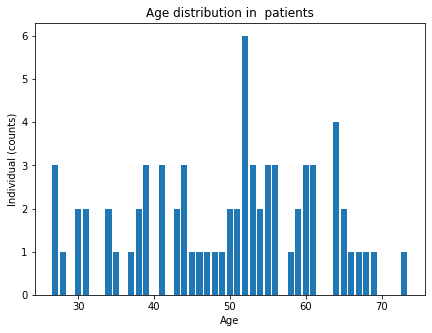

In [ ]:
Age_coutns = demographics['Age '].value_counts()

plt.figure(figsize = (7,5))
plt.bar(Age_coutns.index, Age_coutns.values)
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in  patients')

Let's have a look at the gender distribution in the population.

The proportion between women and men is:  [0.97222222]


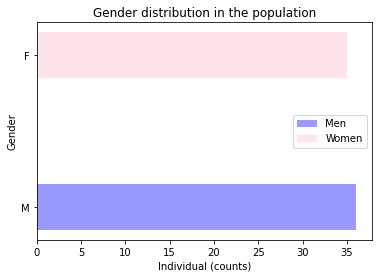

In [ ]:
female = demographics['Gender'] == 'F'
female_counts = demographics[female]['Gender'].value_counts()
male = demographics['Gender'] == 'M'
male_counts = demographics[male]['Gender'].value_counts()

width=0.3
plt.barh(male_counts.index, male_counts.values, width, alpha=0.4, color = 'blue', label = 'Men')
plt.barh(female_counts.index, female_counts.values, width, alpha=0.4, color ='pink', label = 'Women')
plt.legend()
plt.xlabel('Individual (counts)')
plt.ylabel('Gender')
plt.title('Gender distribution in the population')

print('The proportion between women and men is: ', female_counts.values/male_counts.values)

The proportion between men and women in the dataset is almost one, which means there are almost as many women as men in the population.

Let's have a look at the pathology distibution in the population.

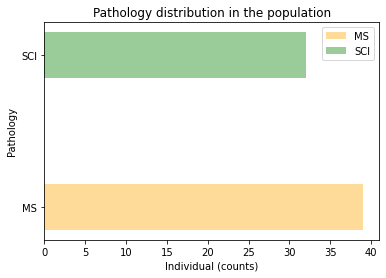

In [ ]:
MS  = demographics['Pathology'] == 'MS'
MS_coutns = demographics[MS]['Pathology'].value_counts()

SCI  = demographics['Pathology'] == 'SCI'
SCI_coutns = demographics[SCI]['Pathology'].value_counts()

width=0.3
plt.barh(MS_coutns.index, MS_coutns.values, width, alpha=0.4, color = 'orange', label = 'MS')
plt.barh(SCI_coutns.index, SCI_coutns.values, width, alpha=0.4, color = 'green', label = 'SCI')
plt.ylabel('Pathology')
plt.xlabel('Individual (counts)')
plt.title('Pathology distribution in the population')
plt.legend()

There are more MS patients than SCI patients in the population, but there is not an extreme difference.

Let's have a look at the age distibution across SCI and MS patients.

Text(0.5, 1.0, 'Age distribution in SCI patients')

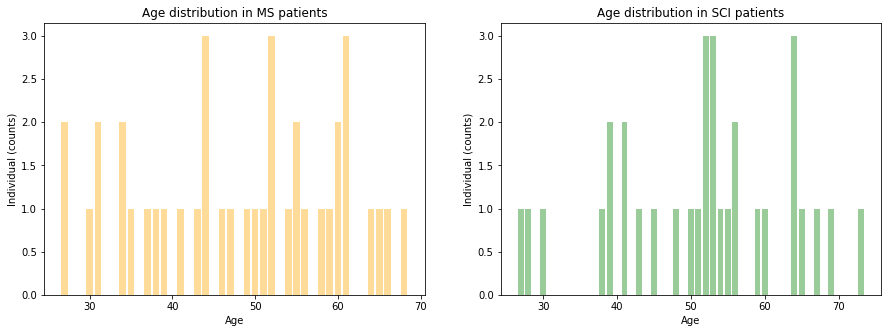

In [ ]:
MS  = demographics['Pathology'] == 'MS'
MS_coutns = demographics[MS]['Age '].value_counts()

SCI  = demographics['Pathology'] == 'SCI'
SCI_coutns = demographics[SCI]['Age '].value_counts()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.bar(MS_coutns.index, MS_coutns.values, alpha=0.4, color = 'orange')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS patients')

plt.subplot(1,2,2)
plt.bar(SCI_coutns.index, SCI_coutns.values, alpha=0.4, color = 'green')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI patients')

We cannot state from these 2 plots that are more young or old patients in one pathology group than another. It seems the age distribution between these 2 pathologies is quite similar.

Let's see the gender distribution across SCI and MS patients.

Text(0.5, 1.0, 'MS and SCI distributions across gender')

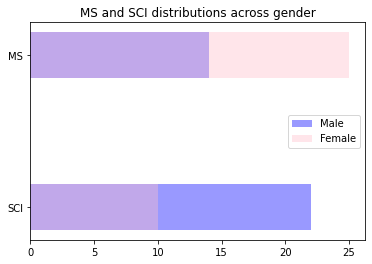

In [ ]:
female = demographics['Gender'] == 'F'
female_counts = demographics[female]['Pathology'].value_counts()
male = demographics['Gender'] == 'M'
male_counts = demographics[male]['Pathology'].value_counts()

width=0.3
plt.barh(male_counts.index, male_counts.values, width, alpha=0.4, color = 'blue', label = 'Male')
plt.barh(female_counts.index, female_counts.values, width, alpha=0.4, color ='pink', label = 'Female')
plt.legend()
plt.title('MS and SCI distributions across gender')

From the bar plot we see that in population there are more men with SCI than women. This is a known trend, men present around 80 % of the overall SCI cases (McColl et al., 2004).

Let's see now the age distribution in SCI and MS in men and women.

Text(0.5, 1.0, 'Age distribution in MS men')

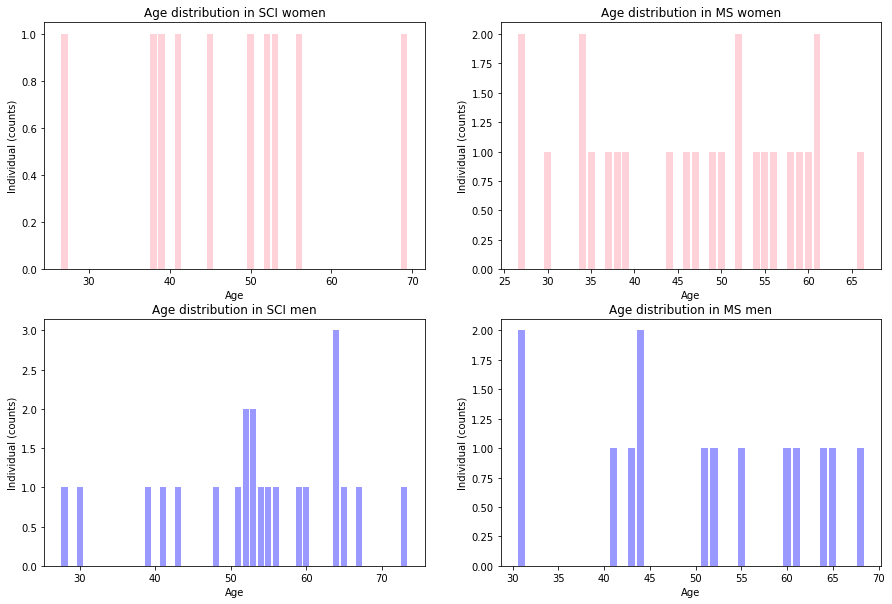

In [ ]:
female_SCI = (female) & (demographics['Pathology'] == 'SCI')
female_MS = (female) & (demographics['Pathology'] == 'MS')
male_SCI = (male) & (demographics['Pathology'] == 'SCI')
male_MS = (male) & (demographics['Pathology'] == 'MS')


demographics[female_SCI]['Age '].value_counts()

plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.bar(demographics[female_SCI]['Age '].value_counts().index, demographics[female_SCI]['Age '].value_counts().values, alpha=0.7, color = 'pink')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI women')

plt.subplot(2,2,2)
plt.bar(demographics[female_MS]['Age '].value_counts().index, demographics[female_MS]['Age '].value_counts().values, alpha=0.7, color = 'pink')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS women')

plt.subplot(2,2,3)
plt.bar(demographics[male_SCI]['Age '].value_counts().index, demographics[male_SCI]['Age '].value_counts().values, alpha=0.4, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in SCI men')

plt.subplot(2,2,4)
plt.bar(demographics[male_MS]['Age '].value_counts().index, demographics[male_MS]['Age '].value_counts().values, alpha=0.4, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Individual (counts)')
plt.title('Age distribution in MS men')

McColl et al., 2004, could demonstrate that men tend to be injured (SCI) at an earlier age in comparison to women. From our above plots, we do not see this trend, but similar age distribution between men and women with both MS and SCI.

Now let's have a look at the distribution of the lesion level in SCI patients.

In [ ]:
demographics.head(1)

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg
0,1,F,45,SCI,12.0,NaN,T10,D,608,L


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lesion level distribution in SCI patients')

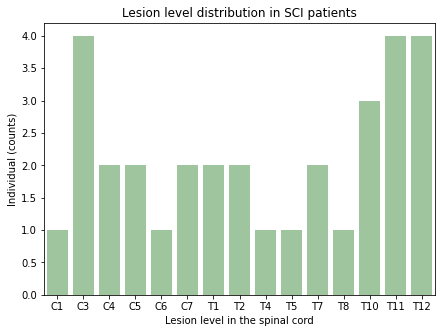

In [ ]:
SCI = demographics['Pathology'] == 'SCI'

myorder = ['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T4', 'T5', 'T7', 'T8', 'T10', 'T11', 'T12']

plt.figure(figsize = (7,5))
sns.barplot(demographics[SCI]['Lesion_Level'].value_counts().index, demographics[SCI]['Lesion_Level'].value_counts().values, alpha=0.4, color = 'green', order = myorder)
plt.xlabel('Lesion level in the spinal cord')
plt.ylabel('Individual (counts)')
plt.title('Lesion level distribution in SCI patients')

Let's group the patients in tetraplegic (C1-C7) and paraplegic (T1-T12), and see their distributions.

In [ ]:
conditions = [demographics['Lesion_Level'] == 'C1', demographics['Lesion_Level'] == 'C3', demographics['Lesion_Level'] == 'C4',
              demographics['Lesion_Level'] == 'C5', demographics['Lesion_Level'] == 'C6', demographics['Lesion_Level'] == 'C7',
              demographics['Lesion_Level'] == 'T1', demographics['Lesion_Level'] == 'T2', demographics['Lesion_Level'] == 'T4',
              demographics['Lesion_Level'] == 'T5', demographics['Lesion_Level'] == 'T7', demographics['Lesion_Level'] == 'T8',
              demographics['Lesion_Level'] == 'T10', demographics['Lesion_Level'] == 'T11', demographics['Lesion_Level'] == 'T12']

choices = ['Tetraplegic', 'Tetraplegic', 'Tetraplegic', 'Tetraplegic', 'Tetraplegic', 'Tetraplegic',
           'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic', 'Paraplegic']
           
demographics['Lesion_group'] = np.select(conditions, choices)

demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic


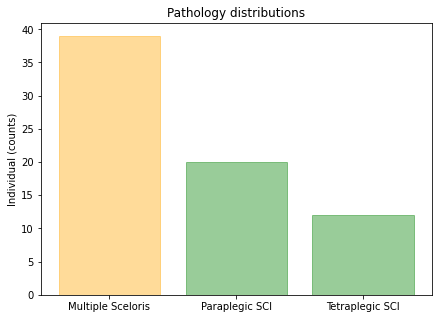

In [ ]:
plt.figure(figsize = (7,5))
barlist = plt.bar(demographics['Lesion_group'].value_counts().index, demographics['Lesion_group'].value_counts().values, alpha=0.4)
plt.ylabel('Individual (counts)')
plt.title('Pathology distributions')
plt.xticks((0, 1, 2), ('Multiple Sceloris', 'Paraplegic SCI', 'Tetraplegic SCI'))
barlist[0].set_color('orange')
barlist[1].set_color('green')
barlist[2].set_color('green')


In our dataset, we have more paraplegic patients (lesion level between T1 and T12) than tetraplegic patients (lesion level between C1 and C7).

### Gait parameters

Now let's have a look at the gait parameters.

We can plot each gait parameter (feature) with the 6MWT.

In [ ]:
len(df.columns)

39

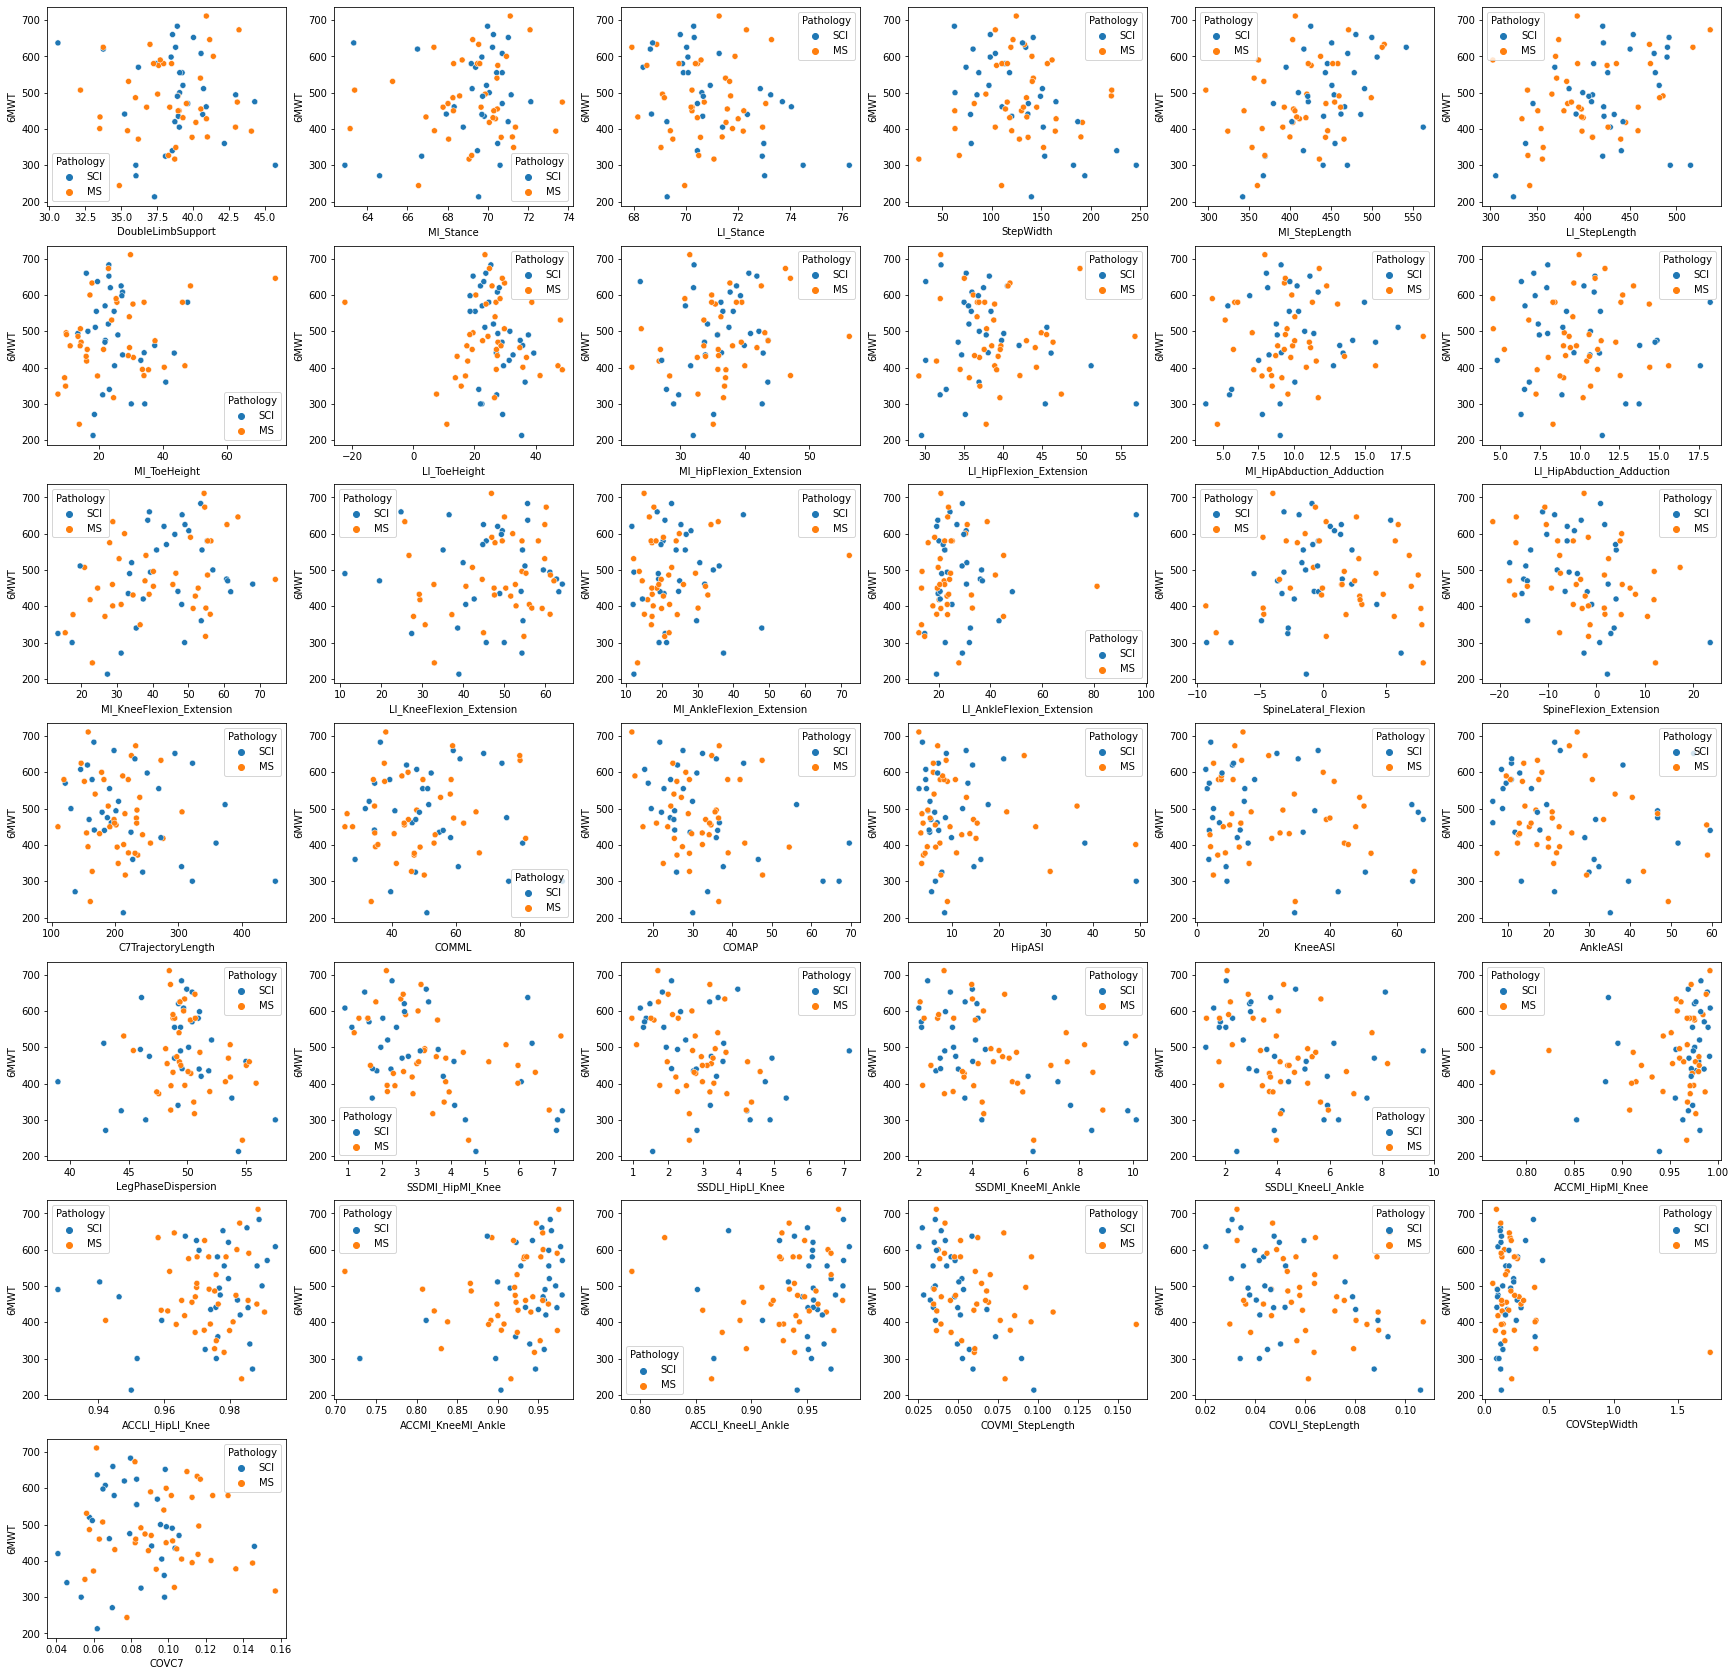

In [ ]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = demographics['Pathology'])
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')


From this plot we can see the behavior between each gait parameter and the 6MWT. It seems there are no linear relationships between any of the gait parameters and the 6MWT. In order to know it, we need to do a correlation analysis (see correlation analysis section).

Also, it is not clear if we see distinct groups between SCI and MS. We can apply k-means clustering with 2 groups and see if we can classify each gait parameters in the corresponding groups (see k-means clustering section).

# Statistical analysis

In this study, we are interested in the 6MWT. The 6MWT is our output, or target variable. The gait parameters are the features. Before analysing the behavior between the features and the 6MWT, we can first have a look at the distribution of some demographics daty with respect to the 6MWT. In addition to the visualizazion of these distributions in the form of boxplots, we can also apply some statistical tests to see if the distibutions between different groups have a different 6MWT. In this study, the significance threshold is set at 0.05 (5%).

In [ ]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Gender

We would like to know if there is a significant difference between women and men in the 6MWT outcome. 

Let's do a z-test, because we are comparing two populations, to see if the two categories (women vs mean) have the same 6MWT.

Null hypothesis: the two categories have the same 6MWT.

Alternate hypothesis: the two categories have different 6MWT.

Significance threshold is 0.05.

Text(0.5, 1.0, 'Six-minute walk test across gender')

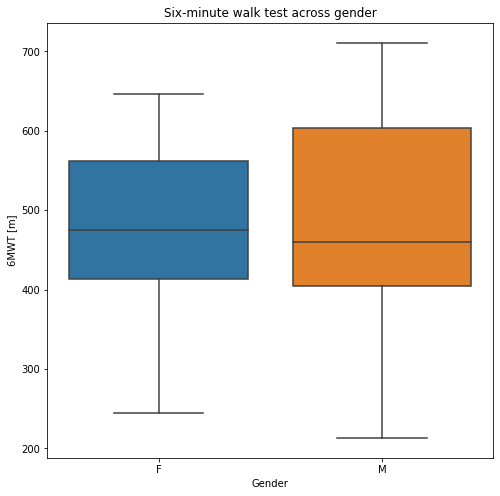

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Gender", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across gender')

In [ ]:
females = demographics[demographics['Gender'] == 'F']['6MWT']
males = demographics[demographics['Gender'] == 'M']['6MWT']
# stats.ttest_ind(females, males)
ztest(females, males, alternative='two-sided')

(-0.509592914855578, 0.6103366886345682)

The p-value is higher than 0.05, which means there is no significant difference between men and women in the 6MWT outcome. In other words, men and women have same 6MWT.

#### Age

We would like to know if there is a significant difference between young and old patients in the 6MWT outcome. 

Let's do a z-test, because we are comparing two populations, to see if the two categories (young vs old) have the same 6MWT.

Null hypothesis: the two categories have the same 6MWT.

Alternate hypothesis: the two categories have different 6MWT.

Significance threshold is 0.05.

In order to separate the entire population into young vs old patients, we can calculate the mean age of the entire population. Patients with an age smaller than the mean age will be assigned to the group of young patients. Patients with an age greater than the mean age will be assigned to the group of old patients. 

In [ ]:
# Let's calculate the mean age of the entire population
MeanAge = np.mean(demographics['Age '])
print('The mean age of the population is: ', MeanAge)

The mean age of the population is:  49.605633802816904


In [ ]:
demographics.shape

(71, 11)

We create a new column named Age_group in which we assign the patient to either the young group or the old group.

In [ ]:
for i in range(0,71):
  if demographics.loc[i,'Age '] <= MeanAge:
    demographics.loc[i, 'Age_group'] = 'Young'
  else:
    demographics.loc[i, 'Age_group'] = 'Old'
demographics.head()

,PatientID,Gender,Age,Pathology,Disease_duration,EDSS,Lesion_Level,AISA,6MWT,MI_Leg,Lesion_group,Age_group
0,1,F,45,SCI,12.0,NaN,T10,D,608,L,Paraplegic,Young
1,2,M,30,SCI,7.0,NaN,T11,D,580,R,Paraplegic,Young
2,3,M,73,SCI,189.0,NaN,C7,D,660,L,Tetraplegic,Old
3,4,M,43,SCI,165.0,NaN,C4,D,435,L,Tetraplegic,Young
4,5,M,41,SCI,150.0,NaN,C7,D,683,R,Tetraplegic,Young


Text(0.5, 1.0, 'Six-minute walk test in young and old patient groups')

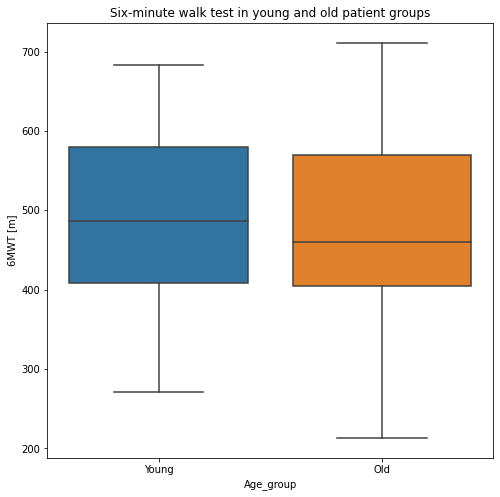

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Age_group", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test in young and old patient groups')

Let's have a look if there is a difference in the 6MWT between young and old patients.

In [ ]:
young = demographics['Age_group'] == 'Young'
old = demographics['Age_group'] == 'Old'

In [ ]:
ztest(demographics[young]['6MWT'], demographics[old]['6MWT'], alternative='two-sided')

(0.5683276553351556, 0.5698125038187942)

The p-value is higher than 0.05, which means there is no significant difference between young and old patients in the 6MWT outcome. In other words, young and old patients have same 6MWT.

### Pathology

We would like to know if there is a significant difference between MS and SCI patients in the 6MWT outcome. 

Let's do a z-test, because we are comparing two populations, to see if the two categories (MS vs SCI) have the same 6MWT.

Null hypothesis: the two categories have the same 6MWT.

Alternate hypothesis: the two categories have different 6MWT.

Significance threshold is 0.05.

1. MS vs SCI

Text(0.5, 1.0, 'Six-minute walk test across MS and SCI')

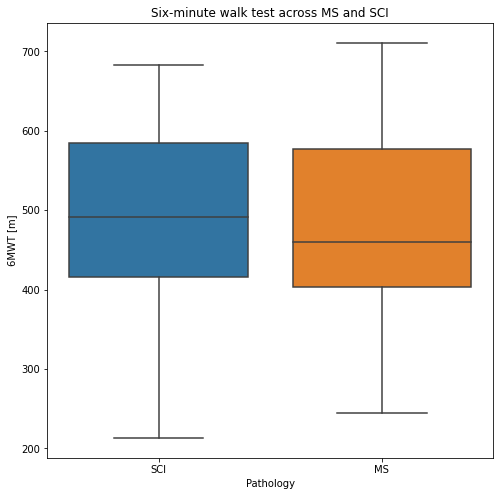

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Pathology", y = '6MWT', data = demographics)
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across MS and SCI')

In [ ]:
SCI = demographics[demographics['Pathology'] == 'SCI']['6MWT']
MS = demographics[demographics['Pathology'] == 'MS']['6MWT']
# stats.ttest_ind(females, males)
ztest(SCI, MS, alternative='two-sided')

(0.1639846042978103, 0.8697432637300448)

The p-value is higher than 0.05, which means there is no significant difference between SCI and MS patients in the 6MWT outcome. In other words, SCI and MS patients have same 6MWT.

2. Paraplegic vs Tetraplegic

Let's first plot the 6MWT distribution in SCI patients according to their lesion level.

Text(0.5, 1.0, 'Six-minute walk test across SCI patients')

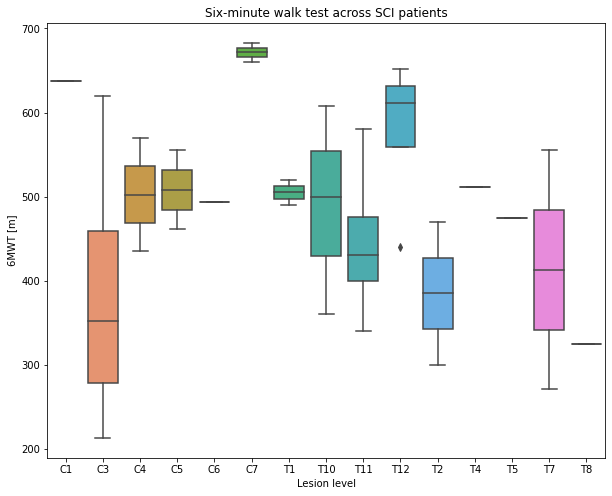

In [ ]:
mydem = demographics.sort_values(by = ['Lesion_Level'], ascending = True)
plt.figure(figsize = (10,8))
sns.boxplot(x = "Lesion_Level", y = '6MWT', data = mydem)
plt.xlabel('Lesion level')
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test across SCI patients')

Now let's  plot the 6MWT distribution in paraplegic (T1-T12) vs tetraplegic (C1-C7) patients.

In [ ]:
mask = (mydem['Lesion_group'] == 'Paraplegic') | (mydem['Lesion_group'] == 'Tetraplegic')
mydem[mask]['Lesion_group'].value_counts()

Paraplegic     20
Tetraplegic    12
Name: Lesion_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Six-minute walk test in paraplegic and tetraplegic patients')

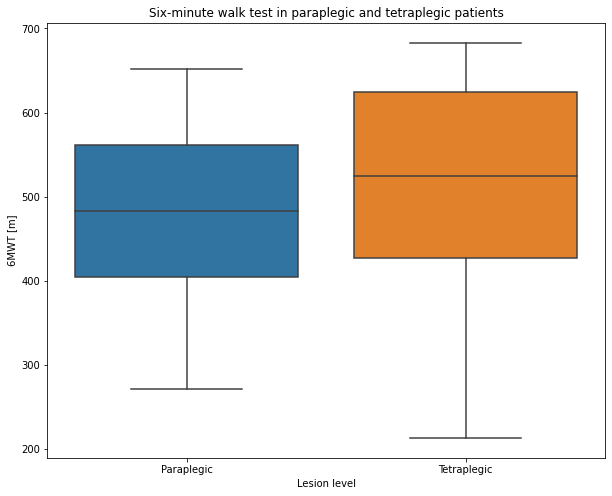

In [ ]:
mydem = demographics.sort_values(by = ['Lesion_group'], ascending = True)
plt.figure(figsize = (10,8))
sns.boxplot(x = "Lesion_group", y = '6MWT', data = mydem[mask])
plt.xlabel('Lesion level')
plt.ylabel('6MWT [m]')
plt.title('Six-minute walk test in paraplegic and tetraplegic patients')

In [ ]:
Paraplegic = mydem[mask][mydem['Lesion_group'] == 'Paraplegic']['6MWT']
Tetraplegic = mydem[mask][mydem['Lesion_group'] == 'Tetraplegic']['6MWT']
# stats.ttest_ind(females, males)
ztest(Paraplegic, Tetraplegic, alternative='two-sided')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(-0.6232489126624132, 0.5331209636739034)

The p-value is higher than 0.05, which means there is no significant difference between paraplegic and tetraplegic patients in the 6MWT outcome. In other words, paraplegic and tetraplegic patients have same 6MWT.

# Correlation analysis

We would like to see which gait parameters are correlated with the 6MWT.

In [ ]:
df.head(1)

,PatientID,DoubleLimbSupport,MI_Stance,LI_Stance,StepWidth,MI_StepLength,LI_StepLength,MI_ToeHeight,LI_ToeHeight,MI_HipFlexion_Extension,LI_HipFlexion_Extension,MI_HipAbduction_Adduction,LI_HipAbduction_Adduction,MI_KneeFlexion_Extension,LI_KneeFlexion_Extension,MI_AnkleFlexion_Extension,LI_AnkleFlexion_Extension,SpineLateral_Flexion,SpineFlexion_Extension,C7TrajectoryLength,COMML,COMAP,HipASI,KneeASI,AnkleASI,LegPhaseDispersion,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,SSDMI_KneeMI_Ankle,SSDLI_KneeLI_Ankle,ACCMI_HipMI_Knee,ACCLI_HipLI_Knee,ACCMI_KneeMI_Ankle,ACCLI_KneeLI_Ankle,COVMI_StepLength,COVLI_StepLength,COVStepWidth,COVC7,6MWT
0,1,40.561167,70.707071,71.277997,103.659175,470.334541,476.277828,27.493149,27.491118,37.73577,36.03453,11.697101,10.913051,50.162964,49.494401,28.165459,30.636414,0.894091,-4.535361,145.846073,47.730483,17.908042,4.472639,2.770041,8.493871,49.667878,0.914553,1.199465,2.02255,1.564936,0.992296,0.993904,0.977612,0.987868,0.025409,0.020163,0.102948,0.066306,608


Let's see if we have empty values

In [ ]:
df.isna().sum()

PatientID                    0
DoubleLimbSupport            0
MI_Stance                    0
LI_Stance                    0
StepWidth                    0
MI_StepLength                0
LI_StepLength                0
MI_ToeHeight                 0
LI_ToeHeight                 0
MI_HipFlexion_Extension      0
LI_HipFlexion_Extension      0
MI_HipAbduction_Adduction    0
LI_HipAbduction_Adduction    0
MI_KneeFlexion_Extension     0
LI_KneeFlexion_Extension     0
MI_AnkleFlexion_Extension    0
LI_AnkleFlexion_Extension    0
SpineLateral_Flexion         0
SpineFlexion_Extension       0
C7TrajectoryLength           0
COMML                        0
COMAP                        0
HipASI                       0
KneeASI                      0
AnkleASI                     0
LegPhaseDispersion           0
SSDMI_HipMI_Knee             0
SSDLI_HipLI_Knee             0
SSDMI_KneeMI_Ankle           0
SSDLI_KneeLI_Ankle           0
ACCMI_HipMI_Knee             0
ACCLI_HipLI_Knee             0
ACCMI_Kn

We do not have empty values.

Let's have a look at the correlation matrix.

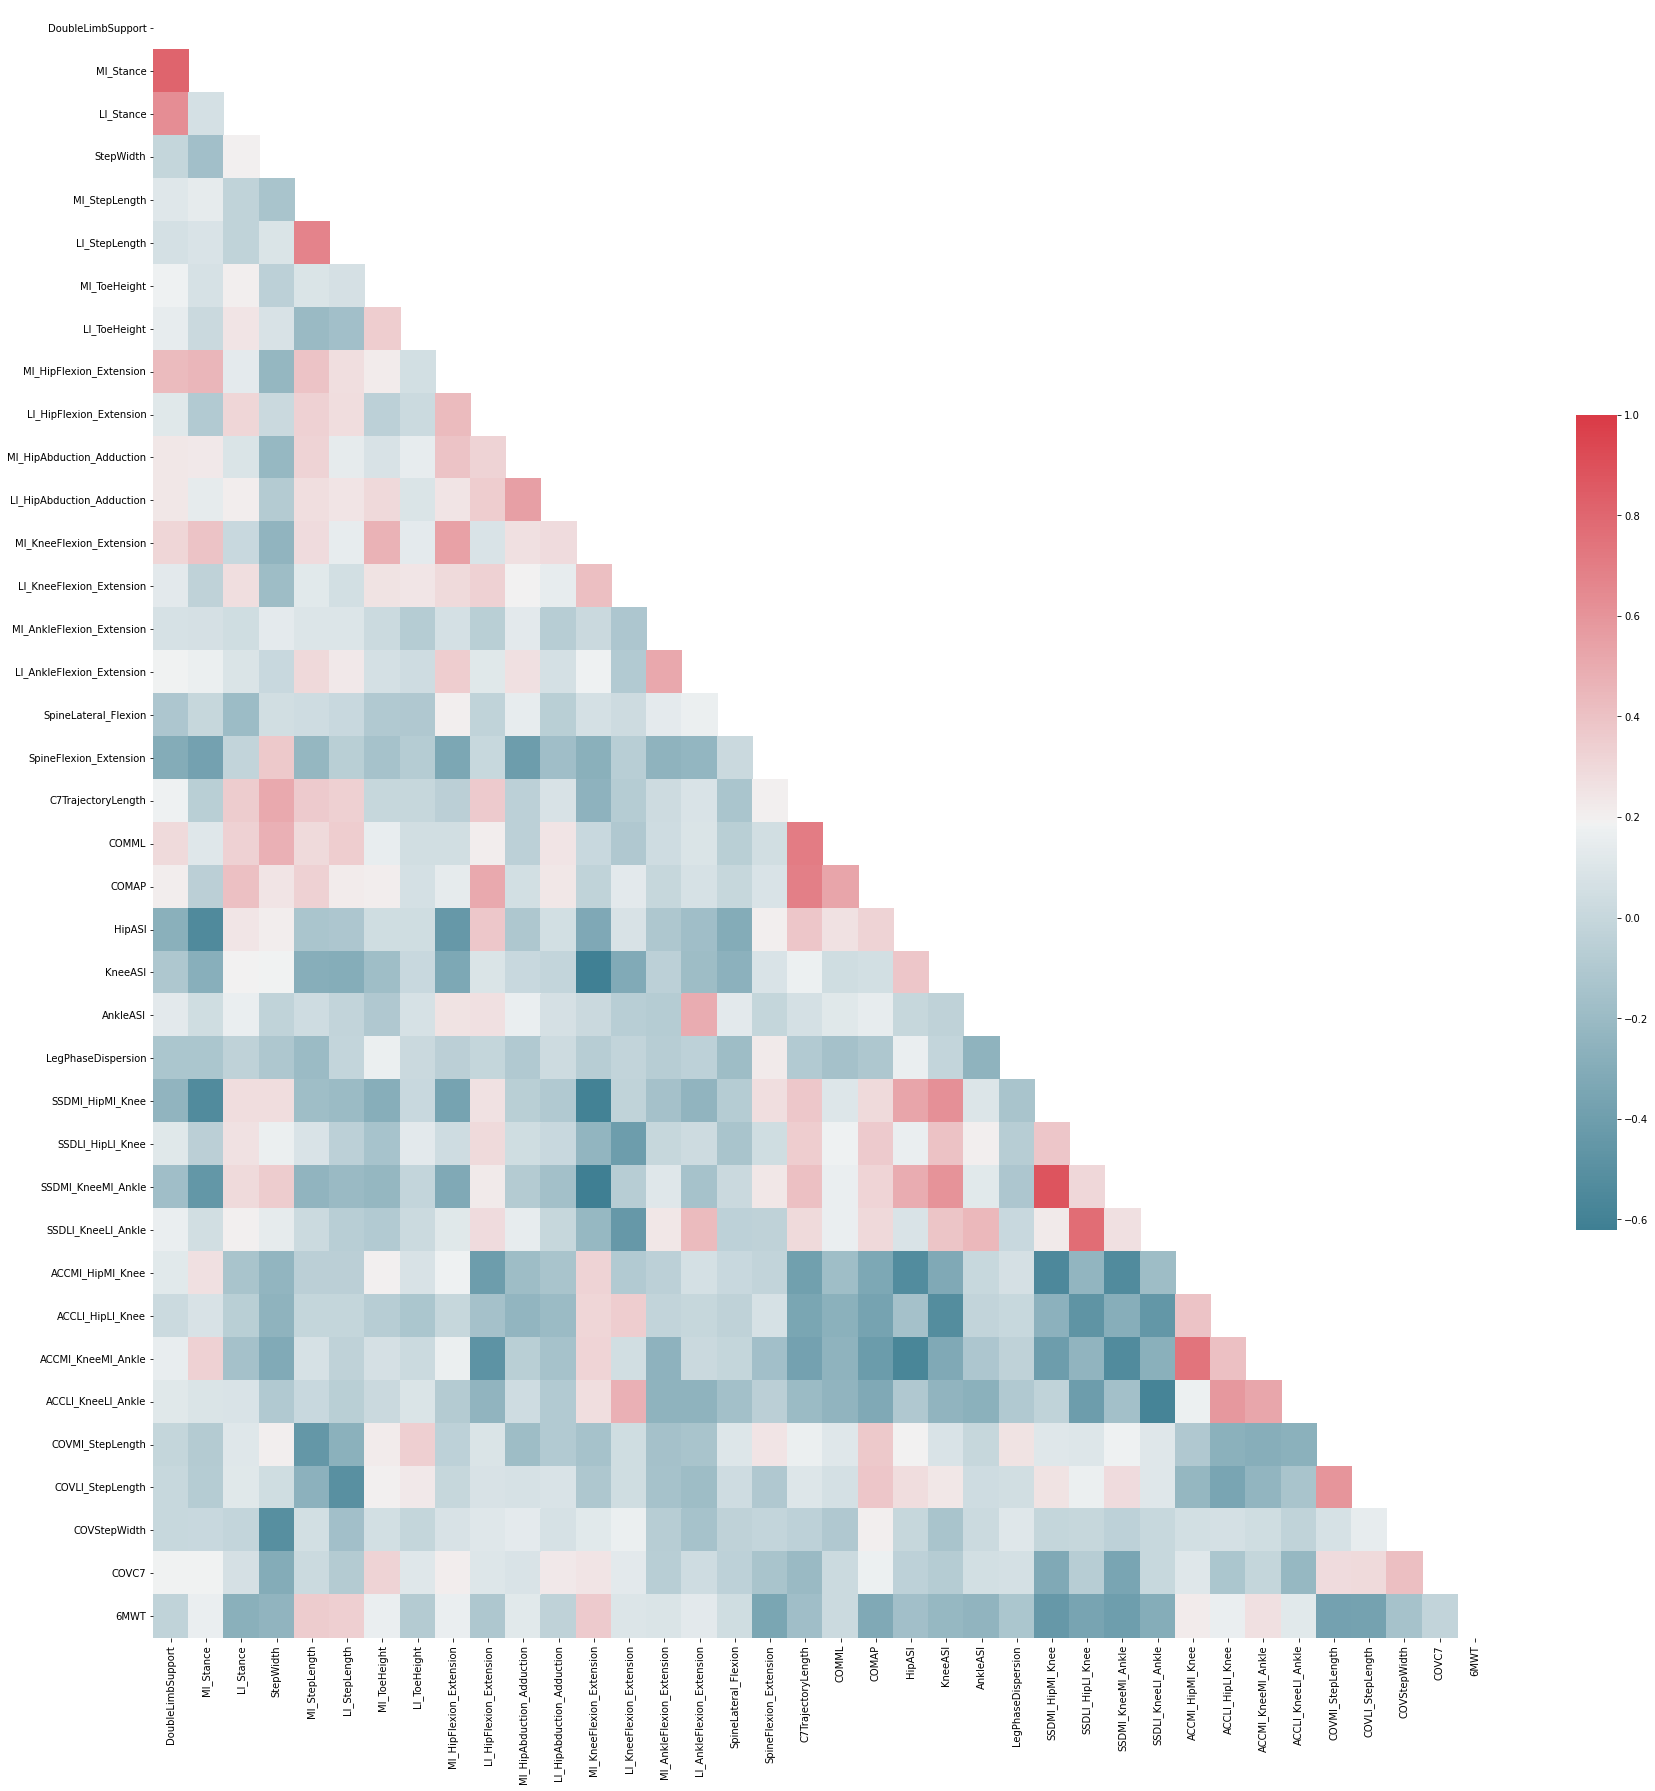

In [ ]:
Data = df.drop(columns=['PatientID'])
#correlation matrix
corr=Data.corr()

#plotting correlation matrix
#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})

Let's have a look at the correlations with the 6MWT outocme that have a correlation coefficient higher than 0.5.

In [ ]:
correlations = corr[abs(corr>.50)]['6MWT']
correlations = correlations[correlations.notna()]
correlations

6MWT    1.0
Name: 6MWT, dtype: float64

We see that there is no variable that are correlated with the 6MWT outcome. From this result we can conclude that a simple correlation analysis cannot explain what variables may explain the 6MWT. Therefore we need a more advanced analysis, machine learning.

# Linear regression

Let's now predict the 6MWT with the gait parameters using linear regression. This prediction will give us a set of gait parameters that are important in the 6MWT outcome. This is essential to know what gait parameters are important for the 6MWT for the rehabilitation of the locomotor function of the patients. Knowing this, the therapy could target more specifically these walking parameters in order to improve the daily walking of patients.

In [ ]:
# Import libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
import time

Let's save all the features in the variable X.

In [ ]:
X = df.iloc[:, 1:-1]
y = pd.DataFrame()
y['6MWT'] = df['6MWT']

We will do cross validation using k-fold. We will do 10-fold cross validation.

We can also scale the data between 0 and 1, because the gait parameters have very different range. 

We will apply feature selection, because we want to find what is the set of gait parameters that give the best predictions. 
1. In a first step, we will apply forward feature selection (FS) from sklearn. In that case, it initially starts with zero feature and finds the one feature that maximizes the cross-validated score. Once that first feature is selected, the procedure is repeated by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

2. In a second step, we will apply backward FS. Backward FS starts initially with all the features and iteratively remove features from the set that minimizes the cross-validated score. 

3. In a third step we will apply bidirectional FS, which is a combination of forward and backward FS. 

For the feature selection, we will do nested cross validation by using 10-fold cross validation.

## Forward feature selection

Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we add the feature.

The code takes a 20 min to compute. If you do not want to compute it, you can load the results from github.

In [ ]:
# Import Results from github
#MAE_forward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Forward_Selection/MAE_forward.csv')
#MAE_forward = MAE_forward.drop(columns=['Unnamed: 0'])
#MAPE_forward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Forward_Selection/MAPE_forward.csv')
#MAPE_forward = MAPE_forward.drop(columns=['Unnamed: 0'])
#feature_set_forward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Forward_Selection/feature_set_forward.csv')
#feature_set_forward = feature_set_forward.drop(columns=['Unnamed: 0'])
#Accuracy_forward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Forward_Selection/Accuracy_forward.csv')
#Accuracy_forward = Accuracy_forward.drop(columns=['Unnamed: 0'])


In [ ]:
# Evaluation procedure
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Feature scaling
scaler = MinMaxScaler()

# Initialization
feature_set_forward = pd.DataFrame()
MAE_forward = pd.DataFrame()
MAPE_forward = pd.DataFrame()
Accuracy_forward = pd.DataFrame()

i = 0

start = time.time()
for train_index, test_index in kf.split(X):
  i=i+1
  print('----------------------------')
  print('Training: ', i)

  for n_features in range (1,11):
    result_filtered_features = list()
    Feature_nb = np.array([])
    MAE = np.array([])
    MAPE = np.array([])

    print('--- {} features'.format(n_features))
    SFS = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                n_features_to_select = n_features,
                                direction = 'forward',
                                cv = 10,
                                n_jobs = -1)

    # Training + validation sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
    # Pipeline
    pipeline = Pipeline([('scaler', scaler),
                        ('selector', SFS),
                        ('model', linear_model.LinearRegression())])
      
    # Train model on training sets
    pipe = pipeline.fit(X_train,y_train)


    # Extract selected features
    features = pipe.named_steps['selector']
    filtered_features = X_train.columns[list(features.get_support())]
    result_filtered_features.append(filtered_features)
    feature_set_forward.loc[n_features-1,i-1] =  filtered_features
    print('Number of features: %s' % len(filtered_features))
    Feature_nb = np.append(Feature_nb, len(filtered_features))
    print(filtered_features)

    # Make predictions  
    predictions = pipe.predict(X_test)

    # Calculate mean absolute errors (MAE)
    MAE = abs(predictions - np.array(y_test))
    print('MAE: ', np.round(np.mean(MAE)))

    # Calculate mean absolute percentage error (MAPE)
    MAPE = np.mean(MAE/np.array(y_test))*100
    Accuracy = 100 - MAPE
    print('Accuracy:', np.round(Accuracy), '%')

    # Save errors in the dataframe
    MAE_forward.loc[n_features-1,i-1] = np.mean(MAE)
    MAPE_forward.loc[n_features-1,i-1] = MAPE
    Accuracy_forward.loc[n_features-1,i-1] = Accuracy

end = time.time()
print('----------------------------')
print('Finished!')
print('Elapsed time needed with forward feature selection: ', np.round((end - start)/60), 'min')
print('----------------------------')

----------------------------
Training:  1
--- 1 features
Number of features: 1
Index(['MI_StepLength'], dtype='object')
MAE:  129.0
Accuracy: 71.0 %
--- 2 features
Number of features: 2
Index(['MI_StepLength', 'SSDMI_HipMI_Knee'], dtype='object')
MAE:  110.0
Accuracy: 75.0 %
--- 3 features
Number of features: 3
Index(['MI_StepLength', 'SpineFlexion_Extension', 'SSDMI_HipMI_Knee'], dtype='object')
MAE:  116.0
Accuracy: 74.0 %
--- 4 features
Number of features: 4
Index(['MI_StepLength', 'SpineFlexion_Extension', 'SSDMI_HipMI_Knee',
       'COVStepWidth'],
      dtype='object')
MAE:  115.0
Accuracy: 74.0 %
--- 5 features
Number of features: 5
Index(['MI_StepLength', 'SpineFlexion_Extension', 'AnkleASI',
       'SSDMI_HipMI_Knee', 'COVStepWidth'],
      dtype='object')
MAE:  105.0
Accuracy: 77.0 %
--- 6 features
Number of features: 6
Index(['MI_StepLength', 'SpineFlexion_Extension', 'AnkleASI',
       'SSDMI_HipMI_Knee', 'ACCMI_HipMI_Knee', 'COVStepWidth'],
      dtype='object')
MAE:  105.

In [ ]:
Results_forward = pd.DataFrame()
Results_forward['Number of features'] = range(1,11)
Results_forward['Mean MAE'] = MAE_forward.mean(axis=1)
Results_forward['Mean MAPE'] = MAPE_forward.mean(axis=1)
Results_forward['Mean Accuracy'] = Accuracy_forward.mean(axis=1)

We can plot the mean absolute error and the accuracy for each number of features.

Text(0.5, 1.0, 'Results of the linear regression with forward feature selection')

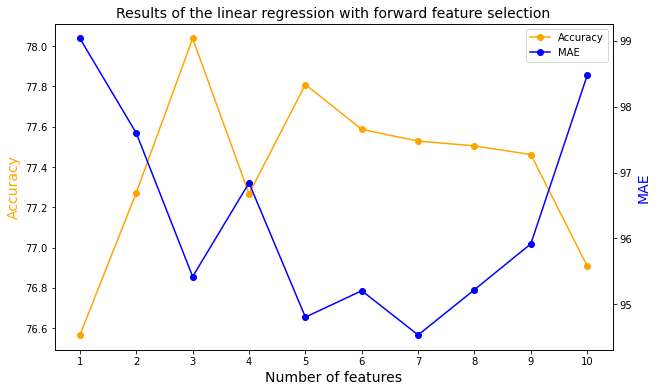

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))

lns1 = ax.plot(Results_forward["Number of features"], Results_forward["Mean Accuracy"], 'o-', color = "orange", label = 'Accuracy')
ax.set_ylabel("Accuracy", color = "orange", fontsize=14)
ax.set_xlabel("Number of features", fontsize = 14)
ax.set_xticks(range(1, 11))

ax2 = ax.twinx()
lns2 = ax2.plot(Results_forward["Number of features"], Results_forward["Mean MAE"], 'o-', color = "blue", label = "MAE")
ax2.set_ylabel("MAE", color = "blue", fontsize=14)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
plt.title("Results of the linear regression with forward feature selection", fontsize = 14)

From the above plot, we can see that with 3 features we get a high accuracy with a low mean absolute error. Therefore, we can explain this dataset with 3 features with a small absolute error and a good accuracy.

Text(0, 0.5, 'Mean absolute error')

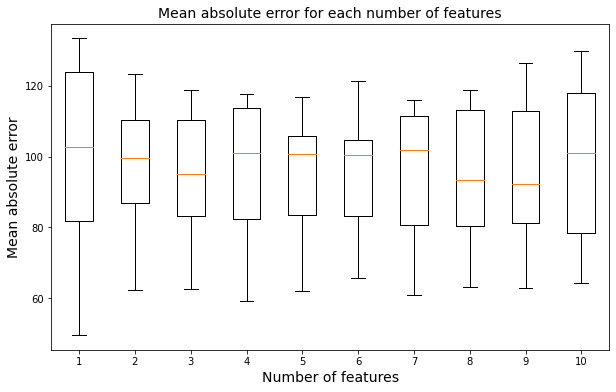

In [ ]:
plt.figure(figsize = (10,6))
plt.boxplot(MAE_forward)
plt.title("Mean absolute error for each number of features", fontsize = 14)
plt.xlabel("Number of features", fontsize = 14)
plt.ylabel("Mean absolute error", fontsize = 14)

In [ ]:
print("The mean absolute error of the model with 3 features is: ", np.round(np.mean(MAE_forward.loc[2,:])))
print("The accuracy of the model with 3 features is: ", np.round(np.mean(Accuracy_forward.loc[2,:])),"%")

The mean absolute error of the model with 3 features is:  95.0
The accuracy of the model with 3 features is:  78.0 %


Since we did 10-fod cross validation, we have 10 feature set with 4 features. In order to choose one of them, we can decide based on the smallest mean absolute error and highest accuracy of the 10 training sets.

In [ ]:
print("The set with the best accuracy is with the training and test set in the column: ", Accuracy_forward.loc[2,:].idxmax(axis=1))
print("The feature set given by this training and test set is: ", feature_set_forward.loc[2, Accuracy_forward.loc[2,:].idxmax(axis=1)])
print("The accuracy of this model is: ", np.round(Accuracy_forward.loc[2, Accuracy_forward.loc[2,:].idxmax(axis=1)]), "%")
print("The MAE of this model is: ", np.round(MAE_forward.loc[2, Accuracy_forward.loc[2,:].idxmin(axis=1)]))

The set with the best accuracy is with the training and test set in the column:  5
The feature set given by this training and test set is:  Index(['SSDMI_HipMI_Knee', 'SSDLI_HipLI_Knee', 'COVMI_StepLength'], dtype='object')
The accuracy of this model is:  86.0 %
The MAE of this model is:  113.0


Using 3 features, given by a forward feature selection and with linear regression, we can reach a very good accuracy of 86%. The 3 features are: SSDMI_HipMI_Knee, SSDLI_HipLI_Knee, COVMI_StepLength

Let's see if the selected features are correlated with each other.

In [ ]:
myfeatures_forward = list(['SSDMI_HipMI_Knee', 'SSDLI_HipLI_Knee', 'COVMI_StepLength'])
myfeatures_forward

['SSDMI_HipMI_Knee', 'SSDLI_HipLI_Knee', 'COVMI_StepLength']

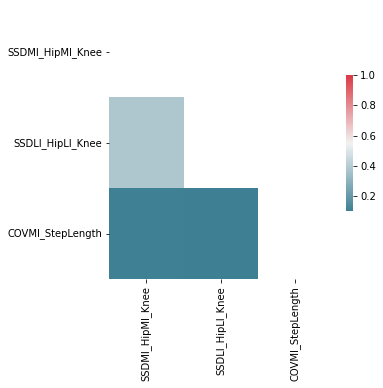

In [ ]:
Data = pd.DataFrame()
#Data = df[feature_set_forward.loc[2, Accuracy_forward.loc[2,:].idxmax(axis=1)]]
Data = df[myfeatures_forward]

#correlation matrix
corr=Data.corr()

#plotting correlation matrix
#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})

In [ ]:
corr

,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,COVMI_StepLength
SSDMI_HipMI_Knee,1.000000,0.384024,0.108624
SSDLI_HipLI_Knee,0.384024,1.000000,0.102403
COVMI_StepLength,0.108624,0.102403,1.000000


Let's see if we have correlated features (threshold of |0.5|).

In [ ]:
correlations = corr[abs(corr>.50)]
correlations = correlations[correlations.notna()]
correlations

,SSDMI_HipMI_Knee,SSDLI_HipLI_Knee,COVMI_StepLength
SSDMI_HipMI_Knee,1.0,NaN,NaN
SSDLI_HipLI_Knee,NaN,1.0,NaN
COVMI_StepLength,NaN,NaN,1.0


We do not have any correlated features. We can then use this dataset to explain our dataset with linear regression.

## Backward feature selection

In backward feature selection we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

The code takes a bit more than 1h to compute. If you do not want to compute it, you can load the results from github.

In [ ]:
# Import Results from github
#MAE_backward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Backward_Selection/MAE_backward.csv')
#MAE_backward = MAE_backward.drop(columns=['Unnamed: 0'])

#MAPE_backward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Backward_Selection/MAPE_backward.csv')
#MAPE_backward = MAPE_backward.drop(columns=['Unnamed: 0'])

#feature_set_backward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Backward_Selection/feature_set_backward.csv')
#feature_set_backward = feature_set_backward.drop(columns=['Unnamed: 0'])

#Accuracy_backward = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/Backward_Selection/Accuracy_backward.csv')
#Accuracy_backward = Accuracy_backward.drop(columns=['Unnamed: 0'])


In [ ]:
# Evaluation procedure
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Feature scaling
scaler = MinMaxScaler()

# Initialization
feature_set_backward = pd.DataFrame()
MAE_backward = pd.DataFrame()
MAPE_backward = pd.DataFrame()
Accuracy_backward = pd.DataFrame()

i = 0

start = time.time()
for train_index, test_index in kf.split(X):
  i=i+1
  print('----------------------------')
  print('Training: ', i)

  for n_features in range (1,11):
    result_filtered_features = list()
    Feature_nb = np.array([])
    MAE = np.array([])
    MAPE = np.array([])

    print('--- {} features'.format(n_features))
    SFS = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                n_features_to_select = n_features,
                                direction = 'backward',
                                cv = 10,
                                n_jobs = -1)

    # Training + validation sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
    # Pipeline
    pipeline = Pipeline([('scaler', scaler),
                        ('selector', SFS),
                        ('model', linear_model.LinearRegression())])
      
    # Train model on training sets
    pipe = pipeline.fit(X_train,y_train)


    # Extract selected features
    features = pipe.named_steps['selector']
    filtered_features = X_train.columns[list(features.get_support())]
    result_filtered_features.append(filtered_features)
    feature_set_backward.loc[n_features-1,i-1] =  filtered_features
    print('Number of features: %s' % len(filtered_features))
    Feature_nb = np.append(Feature_nb, len(filtered_features))
    print(filtered_features)

    # Make predictions  
    predictions = pipe.predict(X_test)

    # Calculate mean absolute errors (MAE)
    MAE = abs(predictions - np.array(y_test))
    print('MAE: ', np.round(np.mean(MAE)))

    # Calculate mean absolute percentage error (MAPE)
    MAPE = np.mean(MAE/np.array(y_test))*100
    Accuracy = 100 - MAPE
    print('Accuracy:', np.round(Accuracy), '%')

    # Save errors in the dataframe
    MAE_backward.loc[n_features-1,i-1] = np.mean(MAE)
    MAPE_backward.loc[n_features-1,i-1] = MAPE
    Accuracy_backward.loc[n_features-1,i-1] = Accuracy

end = time.time()
print('----------------------------')
print('Finished!')
print('Elapsed time needed with backward feature selection: ', np.round((end - start)/60), 'min')
print('----------------------------')

----------------------------
Training:  1
--- 1 features
Number of features: 1
Index(['MI_StepLength'], dtype='object')
MAE:  129.0
Accuracy: 71.0 %
--- 2 features
Number of features: 2
Index(['MI_StepLength', 'COMAP'], dtype='object')
MAE:  85.0
Accuracy: 82.0 %
--- 3 features
Number of features: 3
Index(['MI_StepLength', 'COMAP', 'SSDLI_HipLI_Knee'], dtype='object')
MAE:  72.0
Accuracy: 84.0 %
--- 4 features
Number of features: 4
Index(['MI_StepLength', 'COMAP', 'SSDLI_HipLI_Knee', 'ACCLI_KneeLI_Ankle'], dtype='object')
MAE:  64.0
Accuracy: 87.0 %
--- 5 features
Number of features: 5
Index(['MI_StepLength', 'COMAP', 'AnkleASI', 'SSDLI_HipLI_Knee',
       'ACCLI_KneeLI_Ankle'],
      dtype='object')
MAE:  59.0
Accuracy: 89.0 %
--- 6 features
Number of features: 6
Index(['MI_StepLength', 'MI_KneeFlexion_Extension', 'COMAP', 'AnkleASI',
       'SSDLI_HipLI_Knee', 'ACCLI_KneeLI_Ankle'],
      dtype='object')
MAE:  81.0
Accuracy: 83.0 %
--- 7 features
Number of features: 7
Index(['MI_Step

In [ ]:
Results_backward = pd.DataFrame()
Results_backward['Number of features'] = range(1,11)
Results_backward['Mean MAE'] = MAE_backward.mean(axis=1)
Results_backward['Mean MAPE'] = MAPE_backward.mean(axis=1)
Results_backward['Mean Accuracy'] = Accuracy_backward.mean(axis=1)

We can plot the mean absolute error and the accuracy for each number of features.

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))

lns1 = ax.plot(Results_backward["Number of features"], Results_backward["Mean Accuracy"], 'o-', color = "orange", label = 'Accuracy')
ax.set_ylabel("Accuracy", color = "orange", fontsize=14)
ax.set_xlabel("Number of features", fontsize = 14)
ax.set_xticks(range(1, 11))

ax2 = ax.twinx()
lns2 = ax2.plot(Results_backward["Number of features"], Results_backward["Mean MAE"], 'o-', color = "blue", label = "MAE")
ax2.set_ylabel("MAE", color = "blue", fontsize=14)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
plt.title("Results of the linear regression with backward feature selection", fontsize = 14)

From the above plot, we can see that we 4 features we get a high accuracy with a low mean absolute error. Therefore, we can explain this dataset with 4 features with a small absolute error and a good accuracy.

In [ ]:
plt.figure(figsize = (10,6))
plt.boxplot(MAE_backward)
plt.title("Mean absolute error for each number of features", fontsize = 14)
plt.xlabel("Number of features", fontsize = 14)
plt.ylabel("Mean absolute error", fontsize = 14)

In [ ]:
print("The mean absolute error of the model with 4 features is: ", np.round(np.mean(MAE_backward.loc[3,:])))
print("The accuracy of the model with 4 features is: ", np.round(np.mean(Accuracy_backward.loc[3,:])),"%")

Since we did 10-fod cross validation, we have 10 feature set with 4 features. In order to choose one of them, we can decide based on the smallest mean absolute error and highest accuracy of the 10 training sets.

In [ ]:
print("The set with the best accuracy is with the training and test set in the column: ", Accuracy_backward.loc[3,:].idxmax(axis=1))
print("The feature set given by this training and test set is: ", feature_set_backward.loc[3, Accuracy_backward.loc[3,:].idxmax(axis=1)])
print("The accuracy of this model is: ", np.round(Accuracy_backward.loc[3, Accuracy_backward.loc[3,:].idxmax(axis=1)]), "%")
print("The MAE of this model is: ", np.round(MAE_backward.loc[3, Accuracy_backward.loc[3,:].idxmin(axis=1)]))

Using 4 features, given by a backward feature selection and with linear regression, we can reach a very good accuracy of 87%. The 4 features are: MI_StepLength, COMAP, SSDLI_HipLI_Knee, ACCLI_KneeLI_Ankle.

Let's see if the selected features are correlated with each other.

In [ ]:
myfeatures_backward = list(['MI_StepLength', 'COMAP', 'SSDLI_HipLI_Knee', 'ACCLI_KneeLI_Ankle'])
myfeatures_backward

In [ ]:
Data = pd.DataFrame()
Data = df[myfeatures_backward]

#correlation matrix
corr=Data.corr()

#plotting correlation matrix
#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})

In [ ]:
corr

Let's see if we have correlations greater than |0.5|:

In [ ]:
correlations = corr[abs(corr>.50)]
correlations = correlations[correlations.notna()]
correlations

The features are not correlated.

## Bidirectional feature selection

We will use the function SequentialFeatureSelector() of the mlxtend python package. This function has a floating argument which can be considered as extensions to the simpler sequential forward selection and sequential backward selection algorithms. The floating algorithms have an additional exclusion or inclusion step to remove features once they were included (or excluded), so that a larger number of feature subset combinations can be sampled. It is important to emphasize that this step is conditional and only occurs if the resulting feature subset is assessed as "better" by the criterion function after removal (or addition) of a particular feature.

In [ ]:
pip install -U mlmachine==0.1.5

### Forward floating selection

In this section we will apply foward selection and then backward selection, which means that we add a new feature giving a better performance in the model and then we remove features that are worsening the performance of the model. 

The code takes 15 min to compute. If you want to load the output, please run the cell bellow.

In [ ]:
# Import Results from github
#MAE_forwardfloating = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/ForwardFloating_Selection/MAE_forwardfloating.csv')
#MAE_forwardfloating = MAE_forwardfloating.drop(columns=['Unnamed: 0'])

#MAPE_forwardfloating = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/ForwardFloating_Selection/MAPE_forwardfloating.csv')
#MAPE_forwardfloating= MAPE_forwardfloating.drop(columns=['Unnamed: 0'])

#feature_set_forwardfloating = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/ForwardFloating_Selection/feature_set_forwardfloating.csv')
#feature_set_forwardfloating= feature_set_forwardfloating.drop(columns=['Unnamed: 0'])

#Accuracy_forwardfloating = pd.read_csv('https://raw.githubusercontent.com/paulinegut/HS21_BigDataAnalysis_FinalProject_Gut_Chen/main/Linear_Regression/ForwardFloating_Selection/Accuracy_forwardfloating.csv')
#Accuracy_forwardfloating = Accuracy_forwardfloating.drop(columns=['Unnamed: 0'])


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
# If you have errors with the command above, run the command below and then re-run the command above:
# !pip install -U mlmachine==0.1.5

In [ ]:
# Evaluation procedure
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Feature scaling
scaler = MinMaxScaler()

# Initialization
feature_set_forwardfloating = pd.DataFrame()
MAE_forwardfloating = pd.DataFrame()
MAPE_forwardfloating = pd.DataFrame()
Accuracy_forwardfloating = pd.DataFrame()

i = 0

start = time.time()
for train_index, test_index in kf.split(X):
  i=i+1
  print('----------------------------')
  print('Training: ', i)

  for n_features in range (1,11):
    result_filtered_features = list()
    Feature_nb = np.array([])
    MAE = np.array([])
    MAPE = np.array([])

    print('--- {} features'.format(n_features))
    SFS = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                k_features = n_features,
                                forward = True,
                                floating = True,
                                cv = 10,
                                n_jobs = -1)

    # Training + validation sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
    # Pipeline
    pipeline = Pipeline([('scaler', scaler),
                        ('selector', SFS),
                        ('model', linear_model.LinearRegression())])
      
    # Train model on training sets
    pipe = pipeline.fit(X_train,y_train)


    # Extract selected features
    features = pipe.named_steps['selector']
    filtered_features = X_train.columns[list(features.k_feature_idx_)]
    result_filtered_features.append(filtered_features)
    feature_set_forwardfloating.loc[n_features-1,i-1] =  filtered_features
    print('Number of features: %s' % len(filtered_features))
    Feature_nb = np.append(Feature_nb, len(filtered_features))
    print(filtered_features)

    # Make predictions  
    predictions = pipe.predict(X_test)

    # Calculate mean absolute errors (MAE)
    MAE = abs(predictions - np.array(y_test))
    print('MAE: ', np.round(np.mean(MAE)))

    # Calculate mean absolute percentage error (MAPE) 
    MAPE = np.mean(MAE/np.array(y_test))*100
    Accuracy = 100 - MAPE
    print('Accuracy:', np.round(Accuracy), '%')

    # Save errors in the dataframe
    MAE_forwardfloating.loc[n_features-1,i-1] = np.mean(MAE)
    MAPE_forwardfloating.loc[n_features-1,i-1] = MAPE
    Accuracy_forwardfloating.loc[n_features-1,i-1] = Accuracy

end = time.time()
print('----------------------------')
print('Finished!')
print('Elapsed time needed with backward feature selection: ', np.round((end - start)/60), 'min')
print('----------------------------')

In [ ]:
Results_forwardfloating = pd.DataFrame()
Results_forwardfloating['Number of features'] = range(1,11)
Results_forwardfloating['Mean MAE'] = MAE_forwardfloating.mean(axis=1)
Results_forwardfloating['Mean MAPE'] = MAPE_forwardfloating.mean(axis=1)
Results_forwardfloating['Mean Accuracy'] = Accuracy_forwardfloating.mean(axis=1)

We can plot the mean absolute error and the accuracy for each number of features.

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))

lns1 = ax.plot(Results_forwardfloating["Number of features"], Results_forwardfloating["Mean Accuracy"], 'o-', color = "orange", label = 'Accuracy')
ax.set_ylabel("Accuracy", color = "orange", fontsize=14)
ax.set_xlabel("Number of features", fontsize = 14)
ax.set_xticks(range(1, 11))

ax2 = ax.twinx()
lns2 = ax2.plot(Results_forwardfloating["Number of features"], Results_forwardfloating["Mean MAE"], 'o-', color = "blue", label = "MAE")
ax2.set_ylabel("MAE", color = "blue", fontsize=14)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
plt.title("Results of the linear regression with forwardfloating feature selection", fontsize = 14)

From the above plot, we can see that with 3 features we get a good accuracy with a low mean absolute error. Therefore, we can explain this dataset with 3 features with a small absolute error and a good accuracy.

In [ ]:
plt.figure(figsize = (10,6))
plt.boxplot(MAE_forwardfloating)
plt.title("Mean absolute error for each number of features", fontsize = 14)
plt.xlabel("Number of features", fontsize = 14)
plt.ylabel("Mean absolute error", fontsize = 14)

In [ ]:
print("The mean absolute error of the model with 3 features is: ", np.round(np.mean(MAE_forwardfloating.loc[2,:])))
print("The accuracy of the model with 3 features is: ", np.round(np.mean(Accuracy_forwardfloating.loc[2,:])),"%")

Since we did 10-fod cross validation, we have 10 feature set with 4 features. In order to choose one of them, we can decide based on the smallest mean absolute error and highest accuracy of the 10 training sets.

In [ ]:
print("The set with the best accuracy is with the training and test set in the column: ", Accuracy_forwardfloating.loc[2,:].idxmax(axis=1))
print("The feature set given by this training and test set is: ", feature_set_forwardfloating.loc[2, Accuracy_forwardfloating.loc[2,:].idxmax(axis=1)])
print("The accuracy of this model is: ", np.round(Accuracy_forwardfloating.loc[2, Accuracy_forwardfloating.loc[2,:].idxmax(axis=1)]), "%")
print("The MAE of this model is: ", np.round(MAE_forwardfloating.loc[2, Accuracy_forwardfloating.loc[2,:].idxmin(axis=1)]))

Using 3 features, given by a stepwise feature selection and with linear regression, we can reach a very good accuracy of 86%. These features are: SSDMI_HipMI_Knee, SSDLI_HipLI_Knee', COVMI_StepLength.

Now let's see if the features are correlated with each other.

In [ ]:
myfeatures_forwardfloating = list(['SSDMI_HipMI_Knee', 'SSDLI_HipLI_Knee', 'COVMI_StepLength'])
myfeatures_forwardfloating

In [ ]:
Data = pd.DataFrame()
Data = df[myfeatures_forwardfloating]

#correlation matrix
corr=Data.corr()

#plotting correlation matrix
#plot just half of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, mask= mask, vmax=1, cbar_kws={"shrink": .5})

In [ ]:
corr

Let's see if we have correlation coefficients greater than |0.5|:

In [ ]:
correlations = corr[abs(corr>.50)]
correlations = correlations[correlations.notna()]
correlations

The features are not correlated.

## Comparison of the three models

We computed linear regression with forward, backward and forward floating feature selection (FS).

*  Forward: we got a good model with 3 features
*  Backward: we got a good model with 2 features
*  Stepwise: we got a good model with 2 features


In [ ]:
print("The feature set given by backward FS: ", myfeatures_backward, 
      "\n with an accuracy of: ", np.round(Accuracy_backward.loc[3, Accuracy_backward.loc[3,:].idxmax(axis=1)]), "%")

print("The feature set given by forward FS: ", myfeatures_forward,
      "\n with an accuracy of: ", np.round(Accuracy_forward.loc[2, Accuracy_forward.loc[2,:].idxmax(axis=1)]), "%")

print("The feature set given by forward floating FS: ", myfeatures_forwardfloating,
      "\n with an accuracy of: ", np.round(Accuracy_forwardfloating.loc[2, Accuracy_forwardfloating.loc[2,:].idxmax(axis=1)]), "%")


The backward feature selection gave a different set of features than the forward and forward floating feature selection. It also yielded 4 features, making it slightly more complex, but the accuracy is similar to the other two models. Because this analysis was performed to better understand the gait parameters that are important for the 6MWT (close to daily walking) in order to focus physiotherapy on these parameters, we should consider the less complex model. Therefore, the gait parameters SSDMI_HipMI_Knee, SSDLI_HipLI_Knee, and COVMI_StepLength should be targeted during physiotherapy to improve the 6MWT outcome, or simply to improve patients' daily walking.

# k-means clustering

In the following analysis, classification will be studied. In order to apply classification to our dataset, we must first define classes. We will do this by identifying clusters in our dataset by applying k-means clustering.

In [ ]:
import sklearn as skl
from sklearn.cluster import KMeans

In [ ]:
Data.head(1)

## Clustering with gait parameters

We would like to know if we can identify clusters by applying k-means clustering to our gait parameters. Since the range of the gait parameters are very different between each other, let's scale them between 0 and 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

In [ ]:
Data = df.drop(columns = ['PatientID'])
Data[Data.columns] = scaler.fit_transform(Data[Data.columns])
Data.head()

In [ ]:
X = Data.drop(columns=['6MWT'])
X.head()

Let's have a look at the elbow plot to see how many clusters we should take.

In [ ]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In this "elbow" plot we don't see a sharp reduction in inertia to select the ideal amount of groups. We think, from this plot we should take 4 clusters.

#### 4 clusters

Let's to some classification using 4 groups.

In [ ]:
# Let's creat a model
model = KMeans(n_clusters = 4, random_state=42).fit(X)
model.inertia_

In [ ]:
# Let's do some predictions (classification)
predictions = model.predict(X)

In [ ]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(0, len(X.columns)):
  plt.subplot(7, 6, i+1)
  sns.scatterplot(x = X.iloc[:,i], y = df['6MWT'], hue=predictions)
  plt.xlabel(X.iloc[:,i].name)
  plt.ylabel('6MWT')

In all the above plots, we do not see distinct clusters.

Let's try with 2 clusters, since we have MS and SCI. 



#### 2 clusters

In [ ]:
# Let's create a model
model = KMeans(n_clusters = 2, random_state=42).fit(X)
model.inertia_

We have a higher inertia than with 4 groups. But let's see if we can identify distinct clusters in the plots.

In [ ]:
# Let's do some predictions (classification)
predictions = model.predict(X)

In [ ]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(0, len(X.columns)):
  plt.subplot(7, 6, i+1)
  sns.scatterplot(x = X.iloc[:,i], y = df['6MWT'], hue=predictions)
  plt.xlabel(X.iloc[:,i].name)
  plt.ylabel('6MWT')

Again, even with only 2 groups, we do not see distinct cluster.

It seems that using the gait parameters to find clusters in our dataset to not be optimal. 

## Grouping based on the 6MWT 

Intituively we could divide the population based on the 6MWT outcome into 2 groups: poor walkers and good walkers; or into 3 groups: poor walkers, moderate walkers, good walkers.

In [ ]:
# Let's create a dataframe with our features of interest
X = pd.DataFrame()
X['PatientID'] = demographics['PatientID']
X['6MWT'] = demographics['6MWT']
X.head()

Let's have a look at the elbow plot.

In [ ]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

From the above plot, we can see a sharp decrease for 3 groups. Let's create a model using 3 groups (poor, moderate and good walkers).

### 3 groups: poor, moderate and good walkers

In [ ]:
model = KMeans(n_clusters = 3, random_state=42).fit(X)
model.inertia_

In [ ]:
predictions = model.predict(X)

In [ ]:
plt.title('6MWT clustering')
sns.scatterplot(x = X['PatientID'], y = X['6MWT'], hue = predictions)
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'xk', markersize=7)

From the above plot, we can see 3 dinstinct groups corresponding to: poor walkers (2), moderate walkers (1) and good walkers (0).

In [ ]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = predictions)
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')

Let's save these 3 groups into a new column called "Walking_3group" in the demographics dataframe.

In [ ]:
demographics['Walking_3group'] = predictions
demographics.head()

In [ ]:
print('Walking 3 group:')
print('0: good walker')
print('1: moderate walker')
print('2: poor walker')

### 2 groups: poor and good walkers

Let's do the same with 2 groups (poor and good walkers).

In [ ]:
model = KMeans(n_clusters = 2, random_state=42).fit(X)
model.inertia_

In [ ]:
predictions = model.predict(X)

In [ ]:
plt.title('6MWT clustering')
sns.scatterplot(x = X['PatientID'], y = X['6MWT'], hue = predictions)
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'xk', markersize=7)

From the above plot, we can see 2 dinstinct groups corresponding to: poor walkers (0) and good walkers (1). This will be a bit confusing because for the 3 groups population, 0 correpsonds to good walkers. Let's keep the same notation for the 2 groups population.


In [ ]:
newpredictions = [None]*len(predictions)
for i in range(0, len(predictions)):
  if predictions[i] == 1:
    newpredictions[i] = 0
  else:
    newpredictions[i] = 1

print('Old predictions: ', predictions)    
print('New predictions: ', newpredictions)

In [ ]:
plt.title('6MWT clustering')
sns.scatterplot(x = X['PatientID'], y = X['6MWT'], hue = newpredictions)
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'xk', markersize=7)

We can see now that class 0 corresponds to good walkers as for the 3 group analysis.

In [ ]:
plt.figure(figsize = (30,30))
plt.title('Gait parameters vs 6MWT')
for i in range(1, 38):
  plt.subplot(7, 6, i)
  sns.scatterplot(x = df.iloc[:,i], y = df['6MWT'], hue = newpredictions)
  plt.xlabel(df.iloc[:,i].name)
  plt.ylabel('6MWT')

In the above plots, we can clearly see 2 distinct groups. 

Let's save these 2 classes in a new column called "Walking_2group" in the demographics dataframe.

In [ ]:
demographics['Walking_2group'] = newpredictions
demographics.head()

---
# Boqi
From here, the data analysis was done by Boqi Chen.

In [ ]:
print('Walking_2group in demographics dataframe:')
print('0: good walker')
print('1: poor walker')

In [ ]:
print('Walking_3group in demographics dataframe:')
print('0: good walker')
print('1: moderate walker')
print('2: poor walker')

Generate the labels for classification. 


In [ ]:
df['Walking_2group'] = demographics['Walking_2group']
df['Walking_3group'] = demographics['Walking_3group']

**Classifiability/separability test**

T-SNE is a reduction technique that maintains the small scale structure (i.e. what is particularly close to what) of the space, which makes it very good at visualizing data separability. This means that T-Sne is particularly useful for early visualization geared at understanding the degree of data separability. 

For example, if T-SNE graph contains lots of overlapping data, odds are high that classifier will perform badly, no matter what classification method is used. Conversely, if clearly separated data is seen in the T-Sne graph, the underlying, high-dimensional data contains sufficient variability to build a good classifier.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [ ]:
X = df.loc[:, 'DoubleLimbSupport':'COVC7']
y = df['Walking_2group']
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X) 
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')
plt.xlabel('tsne_first')
plt.ylabel('tsne_second')
plt.title('T-SNE results of the data')

As is shown in the T-SNE graph, no clear separating boundary can be observed. This means such high dimentional data might not be classifiable. 

Let's try scaling first. 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
X_embedded_standard_scaler = tsne.fit_transform(standard_scaler.fit_transform(X)) 
sns.scatterplot(X_embedded_standard_scaler[:,0], X_embedded_standard_scaler[:,1], hue=y, legend='full')
plt.xlabel('tsne_first')
plt.ylabel('tsne_second')
plt.title('T-SNE results of standardized data')

In [ ]:
minmax_scaler = MinMaxScaler()
X_embedded_minmax_scaler = tsne.fit_transform(minmax_scaler.fit_transform(X)) 
sns.scatterplot(X_embedded_minmax_scaler[:,0], X_embedded_minmax_scaler[:,1], hue=y, legend='full')
plt.xlabel('tsne_first')
plt.ylabel('tsne_second')
plt.title('T-SNE results of min-max transformed data')

As is shown in the T-SNE graph, the data become more seperable after min-max scaling. Then, let's try classifying the transformed data. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_tuple = (train_test_split(X, y, test_size=0.2, random_state=42), train_test_split(minmax_scaler.fit_transform(X), y, test_size=0.2, random_state=42))
keys = ['Original data', 'Min-max transformed data']
simple_classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20,10))

for i in range(2):
  X_train, X_test, y_train, y_test = X_tuple[i]
  key = keys[i]
  for classifier in simple_classifiers:
        classifier.fit(X_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            name="Method: {}, Data: {}".format(str(classifier), key),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
ax.legend(loc="lower right")
plt.show()


Now let's try tree-based classification.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


X_tuple = (train_test_split(X, y, test_size=0.2, random_state=42), train_test_split(minmax_scaler.fit_transform(X), y, test_size=0.2, random_state=42))
keys = ['Original data', 'Min-max transformed data']
tree_based_classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20,10))

for i in range(2):
  X_train, X_test, y_train, y_test = X_tuple[i]
  key = keys[i]
  for classifier in tree_based_classifiers:
        classifier.fit(X_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            name="Method: {}, Data: {}".format(str(classifier), key),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
ax.legend(loc="lower right")
plt.show()

As is shown in the ROC curve, pre-processing the data with min-max scaler can imporve the performance of almost all classifiers to some extent. Such improvement is significant when it come to linear SVM classifier.

**Feature Selection**

Another way to improve the performance of the classifier is feature selection. Let's first try tree-based feature selection. 

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf = ExtraTreesClassifier(n_estimators=10)
clf = clf.fit(X, y)
selector = SelectFromModel(clf, prefit=False)
selector.fit(X, y)
selected_feat= X.columns[(selector.get_support())].to_list()
print('---------------------------------------------------------------------------------------------------------')
print('The number of selected features is: ', len(selected_feat))
print('The selected features are: ', selected_feat)
print('---------------------------------------------------------------------------------------------------------')
X_new = selector.transform(X)

Now let's see how separable is the selected features after min-max scaling.

In [ ]:
X_embedded_new = tsne.fit_transform(minmax_scaler.fit_transform(X_new)) 
sns.scatterplot(X_embedded_new[:,0], X_embedded_new[:,1], hue=y, legend='full')
plt.xlabel('tsne_first')
plt.ylabel('tsne_second')
plt.title('T-SNE results of selected features with min-max scaling')

As we can see, compared to original data (with all the features), such subset min-max transformed feature is more separable. 

Now, let's try different classifiers on the data. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_tuple = (train_test_split(X, y, test_size=0.2, random_state=42), train_test_split(minmax_scaler.fit_transform(X_new), y, test_size=0.2, random_state=42))
keys = ['Original data', 'Min-max transformed data']
simple_classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20,10))

for i in range(2):
  X_train, X_test, y_train, y_test = X_tuple[i]
  key = keys[i]
  for classifier in simple_classifiers:
        classifier.fit(X_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            name="Method: {}, Data: {}".format(str(classifier), key),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
ax.legend(loc="lower right")
plt.show()

As is shown in the results, more significant improvement can be observed with selected features. 

In order to get a more intuitive understanding, let's visualize the decision boundries of the classifiers.

In [ ]:
import warnings
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

data_tuple = (X, minmax_scaler.fit_transform(X_new))
data = ['All features', 'Selected features']
simple_classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
]

for clf in simple_classifiers:
  for i in range(2):
    X_Train_embedded = TSNE(n_components=2).fit_transform(data_tuple[i])
    model = LogisticRegression().fit(data_tuple[i],y)
    y_predicted = model.predict(data_tuple[i])
    # replace the above by your data and model

    # create meshgrid
    resolution = 100 # 100x100 background pixels
    X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
    X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
    xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

    # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
    background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
    voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
    voronoiBackground = voronoiBackground.reshape((resolution, resolution))

    #plot
    plt.title('Method: {}, Data: {}'.format(str(clf), data[i]))
    plt.xlabel('tsne_first')
    plt.ylabel('tsne_second')
    plt.contourf(xx, yy, voronoiBackground)
    plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
    plt.show()

It can be observed that the decision boundries are more clear with selected features. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


X_tuple = (train_test_split(X, y, test_size=0.2, random_state=42), train_test_split(minmax_scaler.fit_transform(X_new), y, test_size=0.2, random_state=42))
keys = ['Original data', 'Min-max transformed selected features']
tree_based_classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20,10))

for i in range(2):
  X_train, X_test, y_train, y_test = X_tuple[i]
  key = keys[i]
  for classifier in tree_based_classifiers:
        classifier.fit(X_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            name="Method: {}, Data: {}".format(str(classifier), key),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
ax.legend(loc="lower right")
plt.show()

Such improvement are not seen in tree-based classifiers. In some cases, performance are even worse. 

However, tree-based methods, especially ensemble of trees (e.g., random forests, gradient boosting decision tree, etc.), generally performs better and are more robust to scales of features etc.  

Now, let's do more visualization of tree-based methods. 

In [ ]:
!pip install dtreeviz

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import dtreeviz

rf = RandomForestClassifier(n_estimators=10,
                            max_depth=3,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=42)
rf.fit(X, y)

for i in range(10):
  viz = dtreeviz(rf.estimators_[i], X, y,
                target_name="Good/poor walker",
                feature_names=X.columns,
                title='{}-th decision tree'.format(i))
  viz.save('decision_{}-th_tree.svg'.format(i))
  from google.colab import files
  files.download('decision_{}-th_tree.svg'.format(i))

**Visualize Random Forest**

Let's visualize some decision trees.

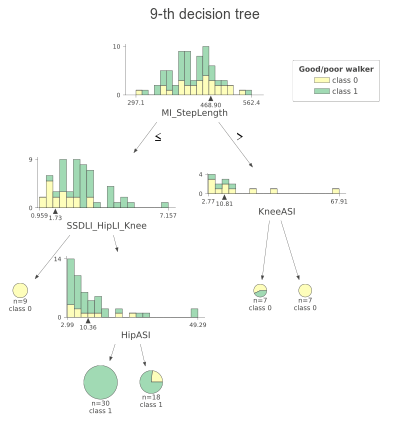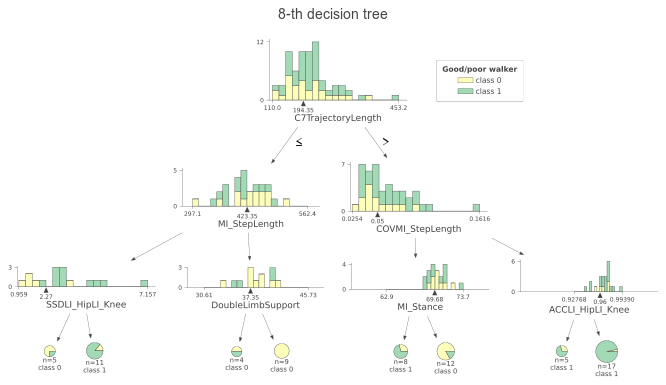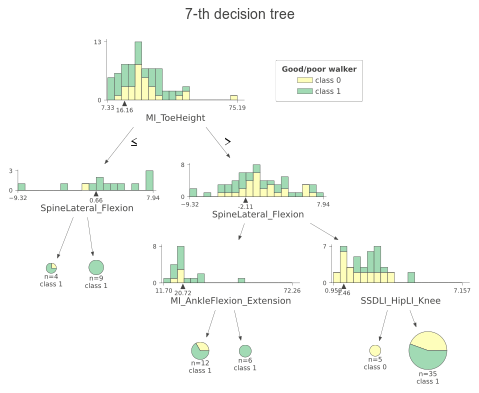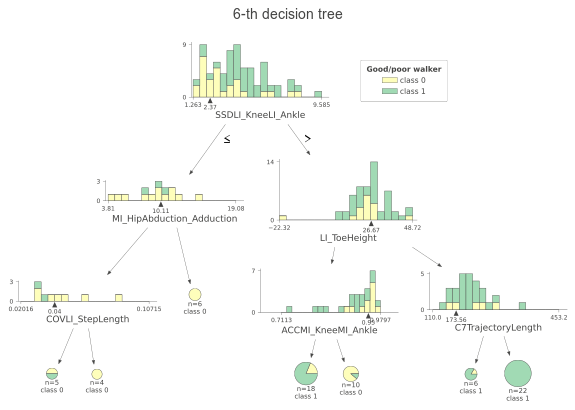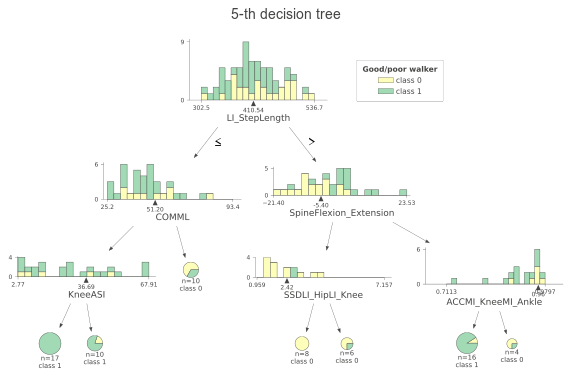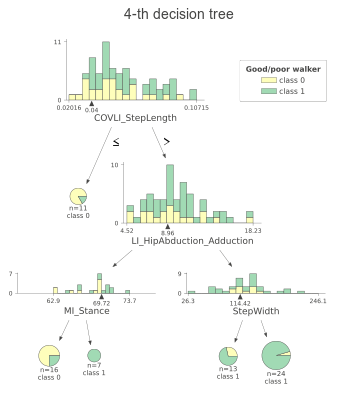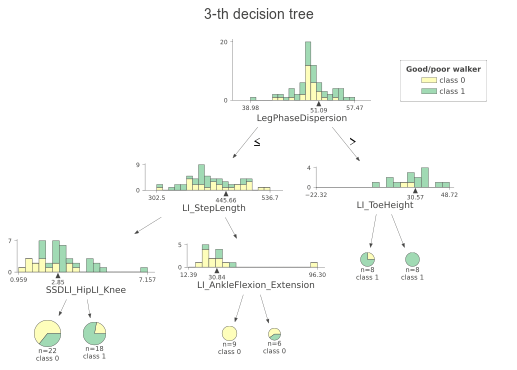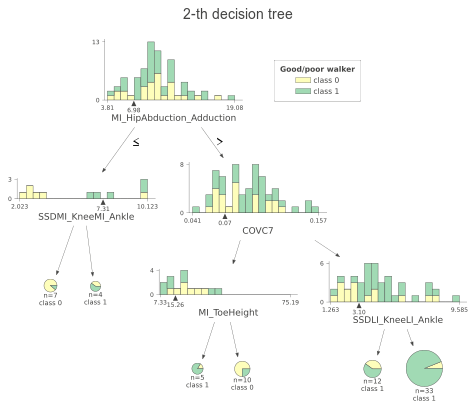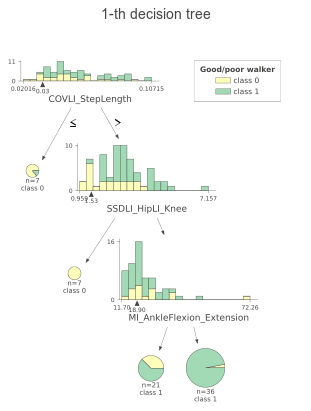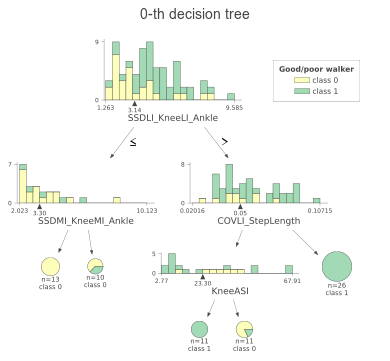

# Discussion and conclusion

In this project we were interested to find what are the most important gait paramters, obtained from a 3D movement anaylsis, for the six-minute walk test (6MWT). The 6MWT is frequently used as primary endpoints in clinical interventional trials [10] and is closely related to daily walking. To do so, stastistical anaylsis and prediction models have been studied. 

In our data set we had a good proportion between women and men, which means our analysis was not biaised by gender. Also, the proportion between the two different pathologies included, multiple sclerosis (MS) and spinal cord injury (SCI), was almost of one. We also included patients with different ages, young and old. From our statistical analysis, we did not find any significant differences between men and women, yound and old, SCI and MS, paraplegic and tetraplegic in the 6MWT outcome.

For our project, we included 38 gait parameters describing the walking function. We first performed a correlation analysis of these 38 gait parmeters with the 6MWT. They were no correlation coefficents higher than 0.5 in absolute value, i.e. there were no gait parameters that correlated with the 6MWT outcome. From this result we can see that a simple correlation analysis cannot explain what gait parameters may explain the 6MWT. We therefore need a more advanced analysis, machine learning. To do this, we performed a linear regression in a first step and a classification in a second step.

For the linear regression, we applied 10-fold cross validation by splitting the dataset into training (80%) and test (20%) sets. We also applied feature selection with nested 10-fold cross-validation. For the feature selection, we used the sequential feature selection (SFS) method in 3 different ways: forward, backward and forard floating. With backward SFS we got 4 gait parameters and a model accuracy of 87%. With forward SFS and forward floating SFS, we obtained the same results. 3 gait parameters were chosen with a model accuracy of 86%. These parameters are the following: *SSDMI_HipMI_Knee, SSDLI_HipLI_Knee, COVMI_StepLength*. Since our study aims to determine which gait parameters are important in daily walking in order to improve gait function by rehabilitation, a non-complex model is necessary. Since the accuracies of these 3 models are similar, we can conclude that with 3 parameters we can predict the 6MWT with very good accuracy. This means that during physiotherapy in the rehabilitation process, training these 3 gait variables will improve the patient's 6MWT score as well as their daily walking.

In a second step we were interested to apply classification methods with 2-classes: poor and good walkers.

In the classification part we first explored different preprocessing methods and how they affect the final classification results. More specifically, we tried two different scaling method, namely data standardization and min-max scaling. We use T-SNE project of high dimensional features to showcase the classificability. The experient results suggest that with min-max scaling the data appeared more separable but with standardization it became even more cluttered. Our suspection of the reason why this was the case is that gait parameters has natural limits (e.g., for angles it should be within the range of 0-360 degree). Thus the distributions of some features are not supposed to be normal distribution. 

We also tried tree-based feature selection to select the most informative features. The results suggest that with min-max scaling and feature selection, the data became even more separable. The subset of selected features contained 16 gait parameters including: *MI_Stance, LI_Stance, MI_StepLength, LI_StepLength, MI_ToeHeight, LI_AnkleFlexion_Extension, SpineFlexion_Extension, COMML, AnkleASI, SSDLI_HipLI_Knee, SSDMI_KneeMI_Ankle, SSDLI_KneeLI_Ankle, ACCMI_KneeMI_Ankle, ACCLI_KneeLI_Ankle, COVMI_StepLength, COVLI_StepLength*. A model with 16 features is a complex model. For clinical settings, complex models are not suitable for clinical application and we therefore should use the parameter set given by linear regression, which contains only 3 features.

We also tried different classification method. In general, ensemble of classifiers such as AdaBoost and random forest performed better (accuracy around 70% with 80/20 train/test split) than simple classifiers such as KNN, SVM and single decision tree (~50%). Moreover, data min-max scaling and feature selection lead to a more significant improvement on performance of simple classifiers (performance gain ~15%). The T-SNE projection of the decision boundaries also showed much clear cut-off when using scaled and selected features. However, for ensemble of classifiers they have much less significance. Sometimes it is even worse. Our suspection is that the ensemble methods can already select features on their own. Thus the pre-selection essentially filtered out some features that might be selected as informative. In another word, the ensemble methods can only selected features out of a subset of all features so that the results can be even worse in some cases. 

Finally, to further explore such effect, we visualized decision trees where we can see how the decision was made. These important characteristics on which the decision was based do indeed correspond, to some extent, to the selected characteristics. 

In conclusion, from this patient dataset including SCI and MS patients with walking disorders, this study suggests that during rehabilitation of patients' walking function, physiotherapists could target and train a set of 3 different gait parameters to improve patients' daily walking. The 3 parameters represent the variability of the step length of the most impaired leg (*COVMI_StepLength*) and the similarity of the gait pattern of the hip and knee joints of the most impaired leg (*SSDMI_HipMI_Knee*) and the least impaired leg (*SSDLI_HipLI_Knee*) to a healthy gait pattern. Based on this information, physiotherapists could, for example, train patients with exercises targeting step length in a non-variable manner, and exercises targeting the hip and knee joints together for gait function.

For future analysis, it would be interesting to have a bigger data set and apply the above analysis in order to have a better comprehension of the important gait parameters for the 6MWT for poor vs good walkers, but also for SCI vs MS patients. Do poor and good walkers would need the same training? If not, this would mean the physiotherpay would target specific and different gait parameters for each category of patients. Also, do MS and SCI patients would need the same training? These are open-ended questions that need to be explored in order to improve treatment at the patient level and have a more personalized therapy.

# References
[1] Robert W. Motl and Lara A. Pilutti. The benefits of exercise training in multiple sclerosis. Nature Reviews Neurology 2012 8:9, 8(9):487–497, 7 2012.

[2] Lea Awai and Armin Curt. Comprehensive assessment of walking function after human spinal cord injury. Progress in Brain Research, 218:1–14, 1 2015.

[3] Ilya Kister, Eric Chamot, Amber R. Salter, Gary R. Cutter, Tamar E. Bacon, and Joseph Herbert. Disability in multiple sclerosis. Neurology, 80(11):1018–1024, 3 2013.

[4] M. Wyndaele and J. J. Wyndaele. Incidence, prevalence and epidemiology of spinal cord injury: what learns a worldwide literature survey? Spinal Cord 2006 44:9, 44(9):523–529, 1 2006.

[5] Lisa A. Simpson, Janice J. Eng, Jane T.C. Hsieh, and Dalton L. Wolfe. The health and life priorities of individuals with spinal cord injury: A systematic review. Journal of Neurotrauma, 29(8):1548–1555, 5 2012.

[6] Deborah Backus. Increasing Physical Activity and Participation in People With Multiple Sclerosis: A Review. Archives of Physical Medicine and Rehabilitation, 97(9):S210–S217, 9 2016.

[7] Rana Karabudak, Maurice Dahdaleh, Mohammed Aljumah, Raed Alroughani, I. Ahmed Alsharoqi, Abdulrahman M. Altahan, Saeed A. Bohlega, Abdulkader Daif, Dirk Deleu, Amer Amous, Jihad S. Inshasi, Peter Rieckmann, Mohammed A. Sahraian, and Bassem I. Yamout. Functional clinical outcomes in multiple sclerosis: Current status and future prospects. Multiple Sclerosis and Related Disorders, 4(3):192–201, 5 2015.

[8] Amie Jackson, Charles Carnel, John Ditunno, Mary Schmidt Read, Michael
Boninger, Mark Schmeler, Steve Williams, William Donovan, Amie B Jackson,
; Charles, T Carnel, John F Ditunno, ; Mary, Schmidt Read, Michael L Boninger,
Mark R Schmeler, / L Apt, Steve R Williams, and William H Donovan. Outcome Measures for Gait and Ambulation in the Spinal Cord Injury Population.
https://doi.org/10.1080/10790268.2008.11753644, 31(5):487–499, 2016.

[9] Michelle H. Cameron and Joanne M. Wagner. Gait abnormalities in multiple sclerosis: Pathogenesis, evaluation, and advances in treatment. Current Neurology and Neuroscience Reports, 11(5):507–515, 10 2011.

[10] Andrew D. Goodman, Theodore R. Brown, Lauren B. Krupp, Randall T. Schapiro,
Steven R. Schwid, Ron Cohen, Lawrence N. Marinucci, and Andrew R. Blight.
Sustained-release oral fampridine in multiple sclerosis: a randomised, double-blind, controlled trial. The Lancet, 373(9665):732–738, 2 2009.

[11] Christian Meyer, Tim Killeen, Christopher S. Easthope, Armin Curt, Marc Bolliger, Michael Linnebank, Björn Zörner, and Linard Filli. Familiarization with treadmill walking: How much is enough? Scientific Reports, 9(1):5232., 9(1):5232, 3 2019.